# Group 11 Final Research Report

Alexander Dujardin 0592036 (VUB - AI)

Alexandre Szomonyak 0565965 (VUB - AI)

Flynn Steppe 0566808 (VUB - AI)

In this report, we will be trying to answer the following three questions:

<i>1. Which steps of the feature engineering process have the most positive effect on increasing the efficiency of our model?</i>

<i>2. What is the impact of different scaling techniques on the accuracy and convergence speed of classifiers using tree-based, distance-based and gradient descent-based algorithms?</i>

<i>3. What is the impact of the training size & data augmentation on the accuracy of a model</i>

NOTE: newest versions of conda packages are needed

# Question 1

In [1]:
# all the required imports to run this question
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn import linear_model, ensemble, preprocessing
from sklearn.model_selection import cross_val_score

# 1.1 Introduction

The research question we will try to answer in this part of the notebook is as follows:

<i>Which steps of the feature engineering process have the most positive effect on increasing the efficiency of our model?</i>

We believe this research question to be of particular interest in the field of Machine Learning because of the multifaceted nature of feature engineering and the extent it can increase the performance of a chosen model, while also helping the user gain more insight into the domain surrounding the dataset. It promotes creativity in dealing with the data, and since the engineering process is entirely dependant on the data, it never becomes boring.

To further concretize our questions, we will list the differenst steps of the feature engineering process here:

1. Feature creation
2. Feature transformation
3. Feature extraction
4. Feature selection

This is by no means an extensive list of steps but it does contain the most important ones. In order to demonstrate that the end results are not dependant on the model we chose, we will demonstrate our findings using two different ones.

To answer this question, we are using the Titanic data set available on https://www.kaggle.com/competitions/titanic/overview. As this notebook is self-contained, we have already included the required files for loading in the data. This data set is extremely popular for feature engineering as the users will try to get an accurate image of the prediction of survival of the quests on the Titanic. We are dealing with a classification problem.

Since our question focuses on the improvement of the efficieny of a model by using different steps of feature engineering, the specific examples of these steps and the cleaning of the data don't really matter. As such, we will use some of the examples from a possible solution to the Titanic data set found on https://towardsdatascience.com/machine-learning-with-the-titanic-dataset-7f6909e58280. The code for these examples has been adapted to fit this notebook but was definitely inspired by this solution.

# 1.2 Data exploration and cleaning

Before we can answer our research question, let us get a more clear view of our dataset. After all, achieving a thorough understanding of our inputs will be of paramount importance to our outputs. Since we try to measure the increased efficiency of individual features of the engineering process, we will need to preprocess our dataset in advance and use this same version of the data set for all four of our steps. Previous steps can't have already been executed. We will come back to this in a bit.

In [2]:
# load the data
data_folder = "./titanic/"

# this data is stored as pandas dataframes
train_data = pd.read_csv(data_folder + "train.csv")
test_data = pd.read_csv(data_folder + "test.csv")

In [3]:
# Show the head of the training dataframe
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Show the head of the testing dataframe
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


As you can see in the tables listed above, we are dealing with 12 different features, "Survived" will be our target variable as it is missing from our testing data set. "Pclass" is the class of ticket a passenger has while "SibSp" and "Parch" refer to the number of siblings/spouses and the number of parents/siblings respectively. The other features are straightforward.

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


From the .describe() tables, we can clearly see that there are over a hundred missing values in the Age columns of both datasets, while there also seems to be a missing value in the Fare column of the test dataset. We can also tell from the .head() tables that the Cabin feature contains missing values. This was not spotted by the .describe() tables since these only talk about numerical features. We will first have to check if there are any other missing values and then deal with them.

In [7]:
print("Train data set: ")
display(train_data.isnull().sum())
print("Test data set: ")
display(test_data.isnull().sum())

Train data set: 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test data set: 


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

These statistics confirm the suspicions we had before and uncovered that the Embarked column of the training dataset also contains two missing values. You could argue that this and the missing value in the Fare column of the test dataset are not that important but we will still try to deal with these.

In [8]:
# We combine both data sets into one for easier preprocessing
all_data = pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

In [9]:
# People with a higher class of ticket, are older on average and women are younger on average
# So, we group by Pclass and Sex to determine the median value to use for missing values
all_data['Age'] = all_data.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

# Thomas is the only passenger whose Fare value is missing, by looking at other similar scenarios, we can take another median
thomas = all_data.loc[(all_data['Pclass'] == 3) & (all_data['SibSp'] == 0) & (all_data['Embarked'] == 'S')]['Fare'].median()
all_data.loc[all_data['Fare'].isnull(), 'Fare'] = thomas

# We can google individual passengers to find missing information as well, both missing values of Embarked came from Southhampton
all_data.loc[all_data['Embarked'].isnull(), 'Embarked'] = 'S'

display(all_data.isnull().sum())

C:\Users\alexa\AppData\Local\Temp\ipykernel_2432\944647427.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  all_data['Age'] = all_data.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))


Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

The misssing values of the Age, Embarked and Fare columns have now all been filled with fitting values. We currently did not touch the missing values in the cabin column, because we will extract a new feature from this column during the feature engineering process and then get rid of this column entirely. The Survived column contains missing values since this is our target feature in the test data.

Lastly, before we can move over to the feature engineering process, we need to measure the current efficiency of our model. At the same time, we will introduce the two different types of models we will use in this notebook.

In [10]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [11]:
print("Unique Cabin values: ", all_data['Cabin'].nunique())
print("Unique Embarked values: ", all_data['Embarked'].nunique())
print("Unique Name values: ", all_data['Name'].nunique())
print("Unique Sex values: ", all_data['Sex'].nunique())
print("Unique Ticket values: ", all_data['Ticket'].nunique())

Unique Cabin values:  186
Unique Embarked values:  3
Unique Name values:  1307
Unique Sex values:  2
Unique Ticket values:  929


As you can see, there are still features that contain non-numerical data. These are Cabin, Embarked, Name, Sex and Ticket. The Cabin feature still contains many different missing values as was mentioned previously. Embarked and Sex only have three and two different possible values respectively, so we can easily convert these into numerical data. However, the Name and Ticket columns have too many unique values. Transforming them into numerical data does not seem to benefit our models in any way but since we are trying to retain as much information as possible to perform our future comparisons as accurate as possible, we will keep them for now.

In [12]:
# The two features we want to convert into numerical data
features = ['Embarked', 'Sex']

# To convert these two into numerical data, we use a label encoder to simply represent the data by numbers
for feature in features:
    all_data[feature] = preprocessing.LabelEncoder().fit_transform(all_data[feature])

At this point, our data set has been preprocessed sufficiently to get started on the feature engineering process. We will now make five copies of this data set to use for each of the four steps we will consider and for discussing the final results. To compare all of our results, we will also create two new lists, one for each model.

In [13]:
# Data set for feature creation
all_data1 = all_data.copy()
# Data set for feature transformation
all_data2 = all_data.copy()
# Data set for feature extracrtion
all_data3 = all_data.copy()
# Data set for feature selection
all_data4 = all_data.copy()
# Data set for discussion
all_data5 = all_data.copy()

# List for the first model
All_logistic_scores = []
# List for the second model
All_forest_scores = []

Now, we can convert the remaining three categorical features into numerical ones as well. These can be changed during the feature engineering process so we had to split them from the Embarked and Sex.

In [14]:
# The three features we want to convert into numerical data
features = ['Name', 'Ticket', 'Cabin']

# To convert these three into numerical data, we use a label encoder to simply represent the data by numbers
for feature in features:
    all_data[feature] = preprocessing.LabelEncoder().fit_transform(all_data[feature])

In [15]:
# Now that the data contains only numerical features, we can split it once again into a training and testing set
train_data, test_data = all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

In [16]:
train_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,186,2,7.2500,155,0,1,3,1,1,0.0,720
1,38.0,106,0,71.2833,286,0,2,1,0,1,1.0,816
2,26.0,186,2,7.9250,523,0,3,3,0,0,1.0,914
3,35.0,70,2,53.1000,422,0,4,1,0,1,1.0,65
4,35.0,186,2,8.0500,22,0,5,3,1,0,0.0,649


In [17]:
test_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
891,34.5,186,1,7.8292,638,0,892,3,1,0,376
892,47.0,186,2,7.0000,1266,0,893,3,0,1,582
893,62.0,186,1,9.6875,837,0,894,2,1,0,184
894,27.0,186,2,8.6625,1278,0,895,3,1,0,366
895,22.0,186,2,12.2875,543,1,896,3,0,1,338


In [18]:
# X contains our training features while Y contains our target feature
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.copy()

The first model we will be using is logistic regression. Logistic regression is a commonly used model for training where the independent variable (Y_train) can be classified in a binary way using the dependent variables (X_train). For the Titanic data set this would be if a passenger survived or not, represented by 1 and 0 respectively. The mathematics behind the logistic regression model are as follows:

P(y = 1 | X_train) = 1 / (1 + e^(-z))

The LHS represents the probability of an observation being positive given the X_train data. This probability is calculated using the formula on the RHS: the logistic formula. In this formula, z represents the linear combination of all the weighted features. To calculate these coefficients, logistic regression makes use of the maximum likelihood estimation (MLE).

In [19]:
# We first create the model with max iterations of 10000 to guarantee that it has enough iterations to finish
logistic_regression = linear_model.LogisticRegression(max_iter=10000)
# Now we fit the data in this model
logistic_regression.fit(X_train, Y_train)
# Lastly, we predict the outcome the test data
first_Y_prediction = logistic_regression.predict(X_test)

Our second model is the random forest classifier. Initially, this model will create a certain amount of decision trees based on the number provided during setup. Each of these decision trees will contain random features of our data set, combined with a random set of the training data to avoid the possibility of overfitting as much as possible. Next, the model will start a process called "bagging" where it randomly selects multiple examples from the training set, and uses these examples to train the decision trees. Finally, a majority vote is held between the trees to predict what the target values of the testing set should be.

In [20]:
# We first create the model with 100 decision trees
random_forest = ensemble.RandomForestClassifier(n_estimators=100)
# Now we fit the data in this model
random_forest.fit(X_train, Y_train)
# Lastly, we predict the outcome the test data
second_Y_prediction = random_forest.predict(X_test)

In [21]:
acc_log = round(logistic_regression.score(X_train, Y_train) * 100, 2)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

results = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest'],
    'Score': [acc_log, 
              acc_random_forest]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
81.82,Logistic Regression


initially, we tried comparing the scores of each model. However, the random forest classifier seems to have fitted every single one of our data values. It is highly likely that this is the result of overfitting because of the nature of a random forest and as such, not 100% accurate. Instead, we will perform cross validation and calculate the mean score.

In [22]:
scores = cross_val_score(logistic_regression, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

All_logistic_scores.append(('Base', scores.mean()))

Scores: [0.78888889 0.7752809  0.7752809  0.86516854 0.80898876 0.78651685
 0.80898876 0.79775281 0.80898876 0.80898876]
Mean: 0.8024843945068664
Standard Deviation: 0.024577993570643452


In [23]:
scores = cross_val_score(random_forest, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

All_forest_scores.append(('Base', scores.mean()))

Scores: [0.83333333 0.84269663 0.76404494 0.8988764  0.91011236 0.82022472
 0.85393258 0.82022472 0.85393258 0.84269663]
Mean: 0.8440074906367041
Standard Deviation: 0.039012933824527175


We now have our base scores. The random forest classifier seems to outperform the logistic regression model without any feature engineering but it can still be suffering from some level of overfitting.

# 1.3 Feature Creation

There is definitely some overlap between all of the steps we listed of the feature engineering process. Because of this, we will briefly explain for each step what we consider to be part of that step.

In feature creation, we try to create new features using insights we have gotten from exploring our data. This means creating entirely new features that combine multiple other features or entirely new ones.

In [24]:
# Combining the SibSp and Parch features
all_data1['Family_Size'] = all_data1['SibSp'] + all_data1['Parch'] + 1

# Counting how often a certain type of ticket appears
all_data1['Ticket_Frequency'] = all_data1.groupby('Ticket')['Ticket'].transform('count')

# Using the Name feature to create a title feature and in return, using that to determine who is married or not.
all_data1['Title'] = all_data1['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
all_data1['Is_Married'] = 0
all_data1.loc[all_data1['Title'] == 'Mrs', 'Is_Married'] = 1
title_names = (all_data1['Title'].value_counts() < 10)
all_data1['Title'] = all_data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

In [25]:
all_data1.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Ticket_Frequency,Title,Is_Married
0,22.0,NaN,2,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,2,1,Mr,0
1,38.0,C85,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,2,2,Mrs,1
2,26.0,NaN,2,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,1,1,Miss,0
3,35.0,C123,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,2,2,Mrs,1
4,35.0,NaN,2,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,1,1,Mr,0


In [26]:
# The features we want to convert into numerical data
features = ['Title', 'Cabin']

# To convert these two into numerical data, we use a label encoder to simply represent the data by numbers
for feature in features:
    all_data1[feature] = preprocessing.LabelEncoder().fit_transform(all_data1[feature])

In [27]:
# We drop the remaining four categorical features as we have used them to create features and we want to avoid a high correlation
all_data1 = all_data1.drop(['Name'], axis=1)
all_data1 = all_data1.drop(['Ticket'], axis=1)
all_data1 = all_data1.drop(['SibSp'], axis=1)
all_data1 = all_data1.drop(['Parch'], axis=1)

In [28]:
all_data1.head()

,Age,Cabin,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Family_Size,Ticket_Frequency,Title,Is_Married
0,22.0,186,2,7.2500,1,3,1,0.0,2,1,3,0
1,38.0,106,0,71.2833,2,1,0,1.0,2,2,4,1
2,26.0,186,2,7.9250,3,3,0,1.0,1,1,2,0
3,35.0,70,2,53.1000,4,1,0,1.0,2,2,4,1
4,35.0,186,2,8.0500,5,3,1,0.0,1,1,3,0


The following blocks of code to determine the efficiency of our model with one specific type of feature engineering have to be repeated for every step in our process. Since they are the same as previously, we won't go over them again. We will talk more about the results once all the steps of the feature engineering process have been performed.

In [29]:
# Now that the data contains only numerical features, we can split it once again into a training and testing set
train_data, test_data = all_data1.loc[:890], all_data1.loc[891:].drop(['Survived'], axis=1)

In [30]:
# X contains our training features while Y contains our target feature
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.copy()

In [31]:
# We first create the model with max iterations of 10000 to guarantee that it has enough iterations to finish
logistic_regression = linear_model.LogisticRegression(max_iter=10000)
# Now we fit the data in this model
logistic_regression.fit(X_train, Y_train)
# Lastly, we predict the outcome the test data
first_Y_prediction = logistic_regression.predict(X_test)

In [32]:
# We first create the model with 100 decision trees
random_forest = ensemble.RandomForestClassifier(n_estimators=100)
# Now we fit the data in this model
random_forest.fit(X_train, Y_train)
# Lastly, we predict the outcome the test data
second_Y_prediction = random_forest.predict(X_test)

In [33]:
scores = cross_val_score(logistic_regression, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

All_logistic_scores.append(('Creation', scores.mean()))

Scores: [0.82222222 0.84269663 0.7752809  0.88764045 0.79775281 0.7752809
 0.83146067 0.83146067 0.84269663 0.84269663]
Mean: 0.8249188514357053
Standard Deviation: 0.03262032530965843


In [34]:
scores = cross_val_score(random_forest, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

All_forest_scores.append(('Creation', scores.mean()))

Scores: [0.8        0.86516854 0.74157303 0.83146067 0.86516854 0.86516854
 0.84269663 0.80898876 0.85393258 0.80898876]
Mean: 0.828314606741573
Standard Deviation: 0.037443893979040105


# 1.4 Feature Transformation

Under feature transformation, we consider any existing feature that can be changed using mathematics or other operations in order to hopefully make the model perform more efficiently. 

In [35]:
# As demonstrated here, we create bins for the Fare and Age features
all_data2['Fare'] = pd.qcut(all_data2['Fare'], 5)
all_data2['Age'] = pd.cut(all_data2['Age'].astype(int), 5)

# These two are now considered as ranges so we will have to make them numerical again, as well as apply this for the other data
features = ['Age', 'Fare', 'Name', 'Ticket', 'Cabin']

for feature in features:
    all_data2[feature] = preprocessing.LabelEncoder().fit_transform(all_data2[feature])

In [36]:
all_data2.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,1,186,2,0,155,0,1,3,1,1,0.0,720
1,2,106,0,4,286,0,2,1,0,1,1.0,816
2,1,186,2,1,523,0,3,3,0,0,1.0,914
3,2,70,2,4,422,0,4,1,0,1,1.0,65
4,2,186,2,1,22,0,5,3,1,0,0.0,649


In [37]:
# Now that the data contains only numerical features, we can split it once again into a training and testing set
train_data, test_data = all_data2.loc[:890], all_data2.loc[891:].drop(['Survived'], axis=1)

In [38]:
# X contains our training features while Y contains our target feature
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.copy()

In [39]:
# We first create the model with max iterations of 10000 to guarantee that it has enough iterations to finish
logistic_regression = linear_model.LogisticRegression(max_iter=10000)
# Now we fit the data in this model
logistic_regression.fit(X_train, Y_train)
# Lastly, we predict the outcome the test data
first_Y_prediction = logistic_regression.predict(X_test)

In [40]:
# We first create the model with 100 decision trees
random_forest = ensemble.RandomForestClassifier(n_estimators=100)
# Now we fit the data in this model
random_forest.fit(X_train, Y_train)
# Lastly, we predict the outcome the test data
second_Y_prediction = random_forest.predict(X_test)

In [41]:
scores = cross_val_score(logistic_regression, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

All_logistic_scores.append(('Transformation', scores.mean()))

Scores: [0.81111111 0.78651685 0.76404494 0.86516854 0.82022472 0.74157303
 0.7752809  0.79775281 0.79775281 0.80898876]
Mean: 0.7968414481897628
Standard Deviation: 0.032046643088616454


In [42]:
scores = cross_val_score(random_forest, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

All_forest_scores.append(('Transformation', scores.mean()))

Scores: [0.81111111 0.84269663 0.7752809  0.91011236 0.86516854 0.87640449
 0.84269663 0.80898876 0.83146067 0.82022472]
Mean: 0.838414481897628
Standard Deviation: 0.03648657152141471


# 1.5 Feature Extraction

Feature extraction is the process of extracting specific information from a different, usually categorical, feature. The most common example of this could be transforming a date string into three seperate values of day, month and year.

In [43]:
# To deal with the missing Cabin data, we create a new column Deck, taking the first letter of all cabins (the deck) and using M for missing ones
all_data3['Deck'] = all_data3['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
all_data3 = all_data3.drop(['Cabin'], axis=1)

# The Cabin feature has already been dropped now that we have the Deck feature
features = ['Deck', 'Name', 'Ticket']

for feature in features:
    all_data3[feature] = preprocessing.LabelEncoder().fit_transform(all_data3[feature])

In [44]:
all_data3.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
0,22.0,2,7.2500,155,0,1,3,1,1,0.0,720,7
1,38.0,0,71.2833,286,0,2,1,0,1,1.0,816,2
2,26.0,2,7.9250,523,0,3,3,0,0,1.0,914,7
3,35.0,2,53.1000,422,0,4,1,0,1,1.0,65,2
4,35.0,2,8.0500,22,0,5,3,1,0,0.0,649,7


In [45]:
# Now that the data contains only numerical features, we can split it once again into a training and testing set
train_data, test_data = all_data3.loc[:890], all_data3.loc[891:].drop(['Survived'], axis=1)

In [46]:
# X contains our training features while Y contains our target feature
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.copy()

In [47]:
# We first create the model with max iterations of 10000 to guarantee that it has enough iterations to finish
logistic_regression = linear_model.LogisticRegression(max_iter=10000)
# Now we fit the data in this model
logistic_regression.fit(X_train, Y_train)
# Lastly, we predict the outcome the test data
first_Y_prediction = logistic_regression.predict(X_test)

In [48]:
# We first create the model with 100 decision trees
random_forest = ensemble.RandomForestClassifier(n_estimators=100)
# Now we fit the data in this model
random_forest.fit(X_train, Y_train)
# Lastly, we predict the outcome the test data
second_Y_prediction = random_forest.predict(X_test)

In [49]:
scores = cross_val_score(logistic_regression, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

All_logistic_scores.append(('Extraction', scores.mean()))

Scores: [0.8        0.78651685 0.76404494 0.83146067 0.80898876 0.74157303
 0.7752809  0.79775281 0.80898876 0.79775281]
Mean: 0.7912359550561798
Standard Deviation: 0.024274864195045827


In [50]:
scores = cross_val_score(random_forest, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

All_forest_scores.append(('Extraction', scores.mean()))

Scores: [0.84444444 0.84269663 0.78651685 0.88764045 0.88764045 0.87640449
 0.84269663 0.79775281 0.84269663 0.87640449]
Mean: 0.8484893882646691
Standard Deviation: 0.033400513038064794


# 1.6 Feature Selection

Feature selection is the process of looking at the different features of the current data set and selecting only those that seem to have an important influence on our target variable. There are many different approaches we can to perform this but we chose for the correlation matrix as this matrix shows us the correlation between each individual numerical feature.

C:\Users\alexa\AppData\Local\Temp\ipykernel_2432\1676671160.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = all_data4.corr()


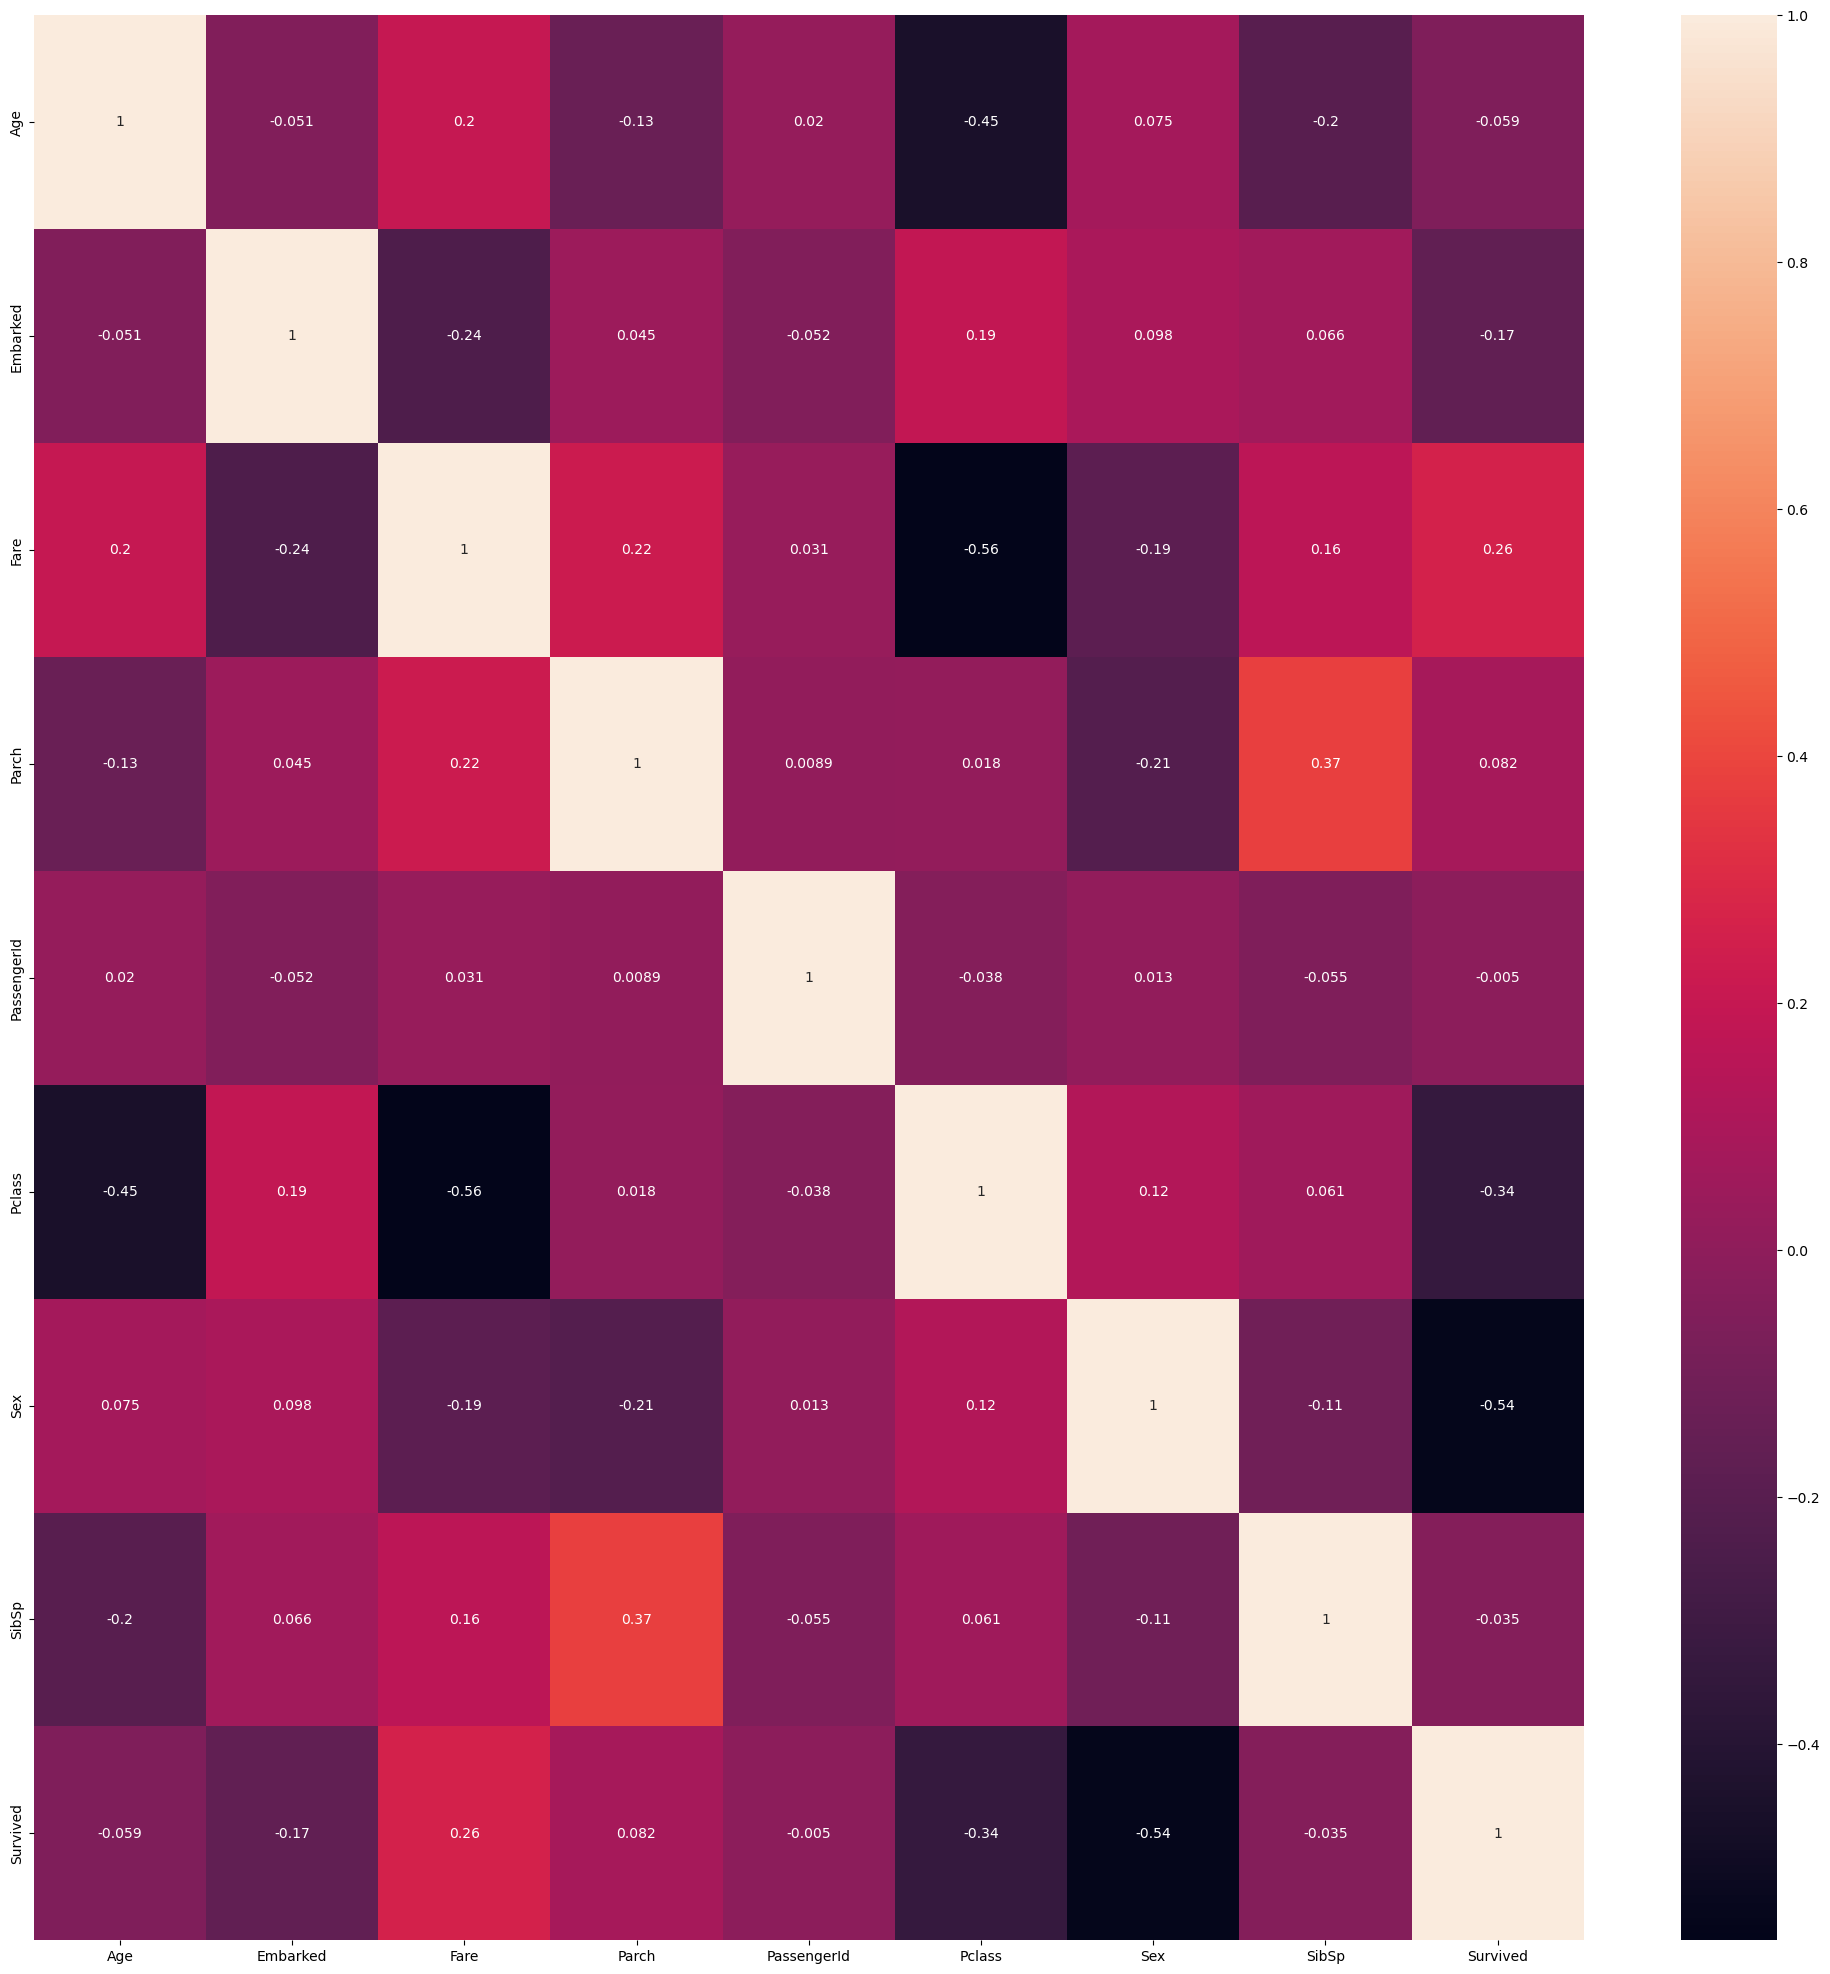

In [51]:
# Creating the correlation matrix
corr_matrix = all_data4.corr()

# Now, we want to visualize this matrix
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [52]:
relevant_features = corr_matrix['Survived'].abs().sort_values(ascending=False).index

In [53]:
print(relevant_features)

Index(['Survived', 'Sex', 'Pclass', 'Fare', 'Embarked', 'Parch', 'Age',
       'SibSp', 'PassengerId'],
      dtype='object')


Looking at the matrix show above, we can only confirm the irrelavance of one feature, the PassengerId. Thinking logically, this feature does indeed seem to not have much relevance to the survival rate of a passenger. We were able to confirm this by sorting them by their relevance to the Survived feature.

In [54]:
# Let's drop PassengerId
all_data4 = all_data4.drop(['PassengerId'], axis=1)

In [55]:
# Once again, we have to transform the Name, Ticket and Cabin features into numerical data
features = ['Name', 'Ticket', 'Cabin']

for feature in features:
    all_data4[feature] = preprocessing.LabelEncoder().fit_transform(all_data4[feature])

In [56]:
all_data4.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,186,2,7.2500,155,0,3,1,1,0.0,720
1,38.0,106,0,71.2833,286,0,1,0,1,1.0,816
2,26.0,186,2,7.9250,523,0,3,0,0,1.0,914
3,35.0,70,2,53.1000,422,0,1,0,1,1.0,65
4,35.0,186,2,8.0500,22,0,3,1,0,0.0,649


In [57]:
# Now that the data contains only numerical features, we can split it once again into a training and testing set
train_data, test_data = all_data4.loc[:890], all_data4.loc[891:].drop(['Survived'], axis=1)

In [58]:
# X contains our training features while Y contains our target feature
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.copy()

In [59]:
# We first create the model with max iterations of 10000 to guarantee that it has enough iterations to finish
logistic_regression = linear_model.LogisticRegression(max_iter=10000)
# Now we fit the data in this model
logistic_regression.fit(X_train, Y_train)
# Lastly, we predict the outcome the test data
first_Y_prediction = logistic_regression.predict(X_test)

In [60]:
# We first create the model with 100 decision trees
random_forest = ensemble.RandomForestClassifier(n_estimators=100)
# Now we fit the data in this model
random_forest.fit(X_train, Y_train)
# Lastly, we predict the outcome the test data
second_Y_prediction = random_forest.predict(X_test)

In [61]:
scores = cross_val_score(logistic_regression, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

All_logistic_scores.append(('Selection', scores.mean()))

Scores: [0.8        0.78651685 0.7752809  0.84269663 0.80898876 0.78651685
 0.80898876 0.78651685 0.82022472 0.80898876]
Mean: 0.8024719101123596
Standard Deviation: 0.018893785470435836


In [62]:
scores = cross_val_score(random_forest, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

All_forest_scores.append(('Selection', scores.mean()))

Scores: [0.81111111 0.84269663 0.74157303 0.8988764  0.88764045 0.83146067
 0.82022472 0.78651685 0.86516854 0.83146067]
Mean: 0.8316729088639201
Standard Deviation: 0.04427544528989717


# 1.7 Results

In [63]:
print(All_logistic_scores)
print(All_forest_scores)

[('Base', 0.8024843945068664), ('Creation', 0.8249188514357053), ('Transformation', 0.7968414481897628), ('Extraction', 0.7912359550561798), ('Selection', 0.8024719101123596)]
[('Base', 0.8440074906367041), ('Creation', 0.828314606741573), ('Transformation', 0.838414481897628), ('Extraction', 0.8484893882646691), ('Selection', 0.8316729088639201)]


# 1.8 Conclusion

# Question 2

In [64]:
import warnings
warnings.filterwarnings("ignore")

Importing some general libraries for data representation and visualization.

In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 2.1 Introduction

In machine learning applications, data preprocessing plays a crucial role in achieving accurate and efficient models. Wrong preprocessed data can have significant impact on the performance and convergence speed of machine learning algorithms. To address this, Scikit-learn library provides a set of preprocessing techniques, including feature scaling which is a important step of machine learning models.

For this research question, the primary goal is to investigate the impact of four different sklearn scalers on the performance accuracy and convergence speed of classification algorithms in a real-world dataset. I will focus on three types of classifiers: tree-based, distance-based and gradient descent-based algorithms. 

Through this research question I try to uncover the reasons behind the observed effects of the scalers, by gaining deeper understanding in the relationships between the scalers, classification algorithms and data characteristics. I'm aiming to provide insights that can guide users in choosing the most appropriate scaler for their specific classification tasks.

# 2.2 Scalers (theoritical study)

This selection of Sklearn scalers have different methods of scaling the data and are most commonly used in various machine learning applications. Scaling is also known as data normalization or standardization, it is the process of tranforming numerical features in a dataset to a common scale, this can make a better version of the data for the algorithms when scaled. Scaling actually means normalizing the features in the dataset into a finite range. <br><br>
A dataset can contain for example information about houses, a feature could be the number of bedrooms from 1-6 and the surface of the house could be in a squared feet range of 500-2000. Euclidian distance is a distance metric used in many machine learning algorithms as a default distance metric to measure the similarity between two data points. The algorithm would see surface as "more important" then the numberr of bedrooms because it has a larger scale.<br><br>
This is why feature scaling is essential for many machine learning algorithms and their accuracy. The choice of what scaler to use depends mostly on the type of algorithm is used and what the characteristics of the data are. <br>
The scalers that will be used in this research project from Sklearn are: 
- Normalizer
- StandardScaler
- MinMaxScaler
- RobustScaler

To show what the scaling characteristics of each scaler, we will use a syntetic dataset; 
- Column 1: This column contains 100 samples drawn from a normal distribution with a mean of 50 and a standard deviation of 10. The normal distribution ensures a symmetrical skewness of 0, resulting in a bell-shaped distribution centered around 50.

- Column 2: Comprising 100 samples, this column is drawn from a uniform distribution where each number does not have an equal probability of occurrence. This feature introduces varying scales into the dataset.

- Column 3: With 100 samples, this column is generated from a log-normal distribution, which exhibits a skewed shape with a long tail. This distribution adds complexity to the dataset.

- Column 4: Consisting of 90 samples drawn from a normal distribution, this column deliberately incorporates 10 outliers to introduce extreme values and assess the robustness of different scalers.

- Column 5: This column adds 100 samples generated from a beta distribution with parameters a and b, specifically set to 5 and 1, respectively, multiplied by 50. The purpose is to introduce a different scale into the dataset.

To examine the scaling characteristics, we apply various scalers to the synthetic dataset. These scalers include, StandardScaler, MinMaxScaler, RobustScaler, and Normalizer. Each scaler operates differently in transforming the dataset's values and brings the features onto a comparable scale. There are more then this four scalers, but we will focuss on them.

In [66]:
np.random.seed(42)

original_data = {
    'Column1': np.random.normal(loc=50, scale=10, size=100),
    'Column2': np.random.uniform(low=-10, high=50, size=100),
    'Column3': np.random.lognormal(mean=1, sigma=1, size=100),
    'Column4': np.concatenate([np.random.normal(loc=0, scale=1, size=90), [20, -20, 15, -15, 10, 80, 60, 80, 65, 100]]),
    'Column5': np.random.beta(5, 1, 100) * 60
}

df_syntetic = pd.DataFrame(original_data)

skewness = df_syntetic.skew()

In [67]:
skewness

Column1   -0.177948
Column2    0.072570
Column3    7.541388
Column4    4.100633
Column5   -1.385575
dtype: float64

In [68]:
df_syntetic.describe()

,Column1,Column2,Column3,Column4,Column5
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,48.961535,19.172371,5.830847,4.024493,49.216006
std,9.081684,17.288635,13.719379,17.526674,9.192583
min,23.802549,-9.696305,0.106324,-20.000000,17.641866
25%,43.990943,4.476781,1.295876,-0.496486,44.445118
50%,48.730437,20.443162,2.889978,0.115422,51.952040
75%,54.059521,31.680568,5.372361,0.758386,55.794878
max,68.522782,49.139027,128.089788,100.000000,59.894165


Distributions, scales and outliers of the original datafram (without scaling):

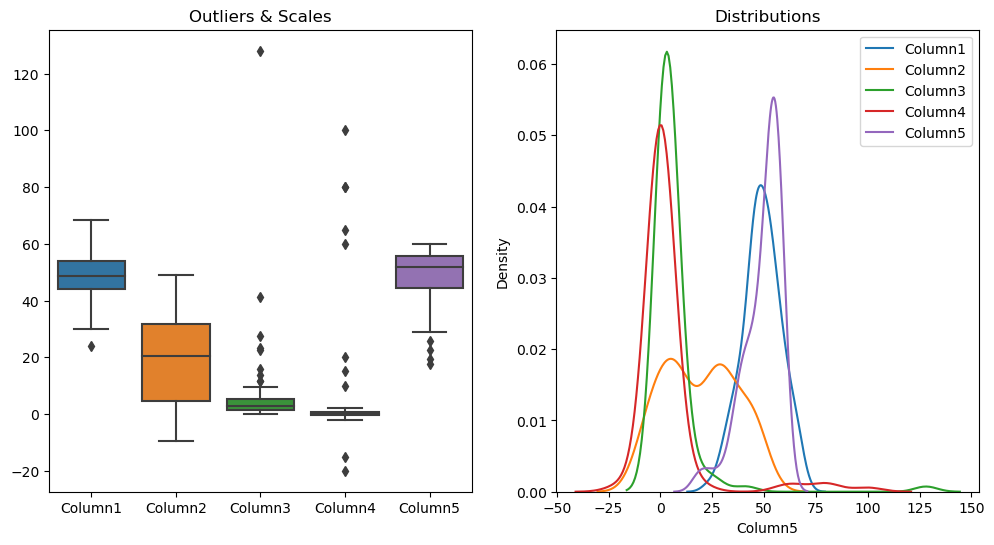

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df_syntetic, ax=axes[0])
axes[0].set_title('Outliers & Scales')

sns.distplot(df_syntetic["Column1"], kde=True, label='Column1', hist=False, ax=axes[1])
sns.distplot(df_syntetic["Column2"], kde=True, label='Column2', hist=False, ax=axes[1])
sns.distplot(df_syntetic["Column3"], kde=True, label='Column3', hist=False, ax=axes[1])
sns.distplot(df_syntetic["Column4"], kde=True, label='Column4', hist=False, ax=axes[1])
sns.distplot(df_syntetic["Column5"], kde=True, label='Column5', hist=False, ax=axes[1])
axes[1].set_title('Distributions')
plt.legend()

plt.show()

<Axes: >

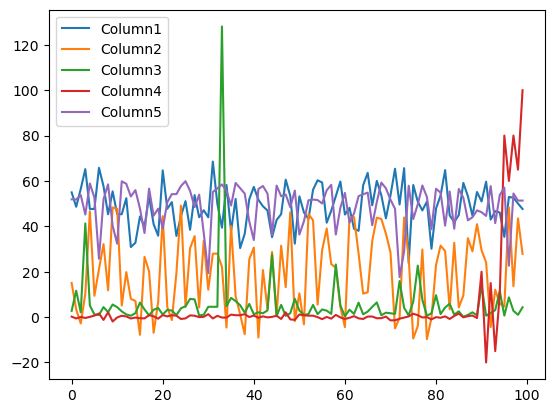

In [70]:
df_syntetic.plot()

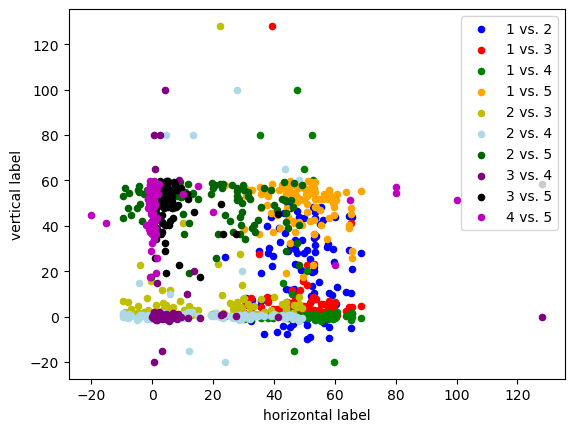

In [71]:
ax = df_syntetic.plot(kind="scatter", x="Column1",y="Column2", color="b", label="1 vs. 2")
df_syntetic.plot(kind="scatter", x="Column1",y="Column3", color="r", label="1 vs. 3", ax=ax)
df_syntetic.plot(kind="scatter", x="Column1",y="Column4", color="g", label="1 vs. 4", ax=ax)
df_syntetic.plot(kind="scatter", x="Column1",y="Column5", color="orange", label="1 vs. 5", ax=ax)
df_syntetic.plot(kind="scatter", x="Column2",y="Column3", color="y", label="2 vs. 3", ax=ax)
df_syntetic.plot(kind="scatter", x="Column2",y="Column4", color="lightblue", label="2 vs. 4", ax=ax)
df_syntetic.plot(kind="scatter", x="Column2",y="Column5", color="darkgreen", label="2 vs. 5", ax=ax)
df_syntetic.plot(kind="scatter", x="Column3",y="Column4", color="purple", label="3 vs. 4", ax=ax)
df_syntetic.plot(kind="scatter", x="Column3",y="Column5", color="black", label="3 vs. 5", ax=ax)
df_syntetic.plot(kind="scatter", x="Column4",y="Column5", color="m", label="4 vs. 5", ax=ax)


ax.set_xlabel("horizontal label")
ax.set_ylabel("vertical label")
plt.show()

## 2.2.1 Normalizer

The Normalizer is a sklearn scaling technique that rescales the features to have a unit norm. It performs data normalization by rescaling each sample independently, so the Normalizer works on the rows, not on the columns, like the other scalers we will see. It normalizes the rows to have a Eucliadian norm of 1, by default with L2 normalization. The normalization doesnt consider any relationships between the samples. It rescales the feature vector to have a unit norm within each sample (it soesn't bring all features on the same scale). The Normalizer only focusses on the direction of the orientation of the feature vectors, disregarding their magnitues, it can slightly transform the distributions of the dataset features. We will see because of scaling the samples this scalers is not a good idea for classification tasks. <br> <br>

L2 Normalization: <br>
> $ x_{normalized} = \frac{{x_{i}}}{{L2norm(X)}} $ <br> <br>
> $where$ <br>
>> $x_{i}$ is the original feature value <br>
>> $x_{normalized}$ is the normalized feature value <br>
>> $L2norm(X)$ is the L2 norm |X| <br> <br>


In [72]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

df_normalized = normalizer.fit_transform(df_syntetic)
df_normalized = pd.DataFrame(df_normalized, columns=df_syntetic.columns)

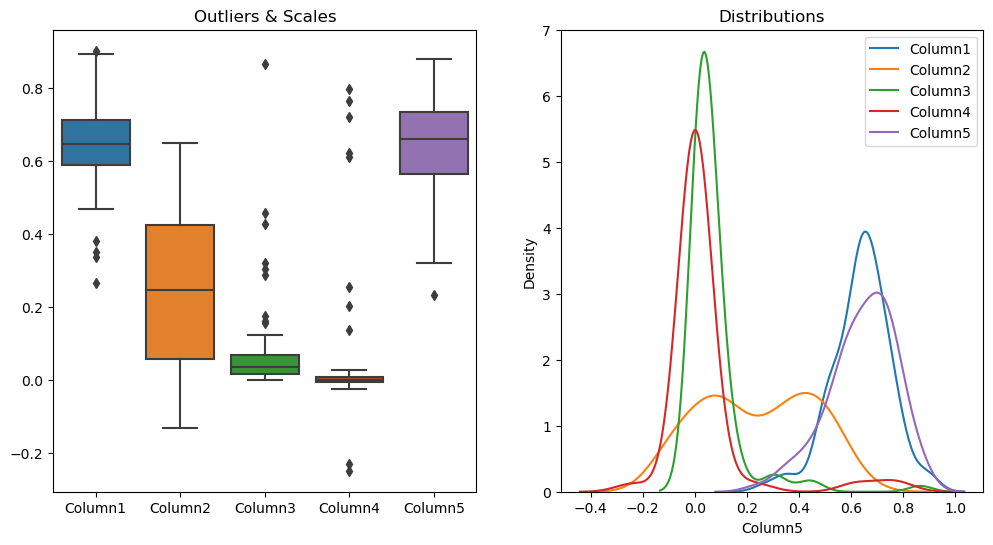

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df_normalized, ax=axes[0])
axes[0].set_title('Outliers & Scales')

sns.distplot(df_normalized["Column1"], kde=True, label='Column1', hist=False, ax=axes[1])
sns.distplot(df_normalized["Column2"], kde=True, label='Column2', hist=False, ax=axes[1])
sns.distplot(df_normalized["Column3"], kde=True, label='Column3', hist=False, ax=axes[1])
sns.distplot(df_normalized["Column4"], kde=True, label='Column4', hist=False, ax=axes[1])
sns.distplot(df_normalized["Column5"], kde=True, label='Column5', hist=False, ax=axes[1])
axes[1].set_title('Distributions')
plt.legend()

plt.show()

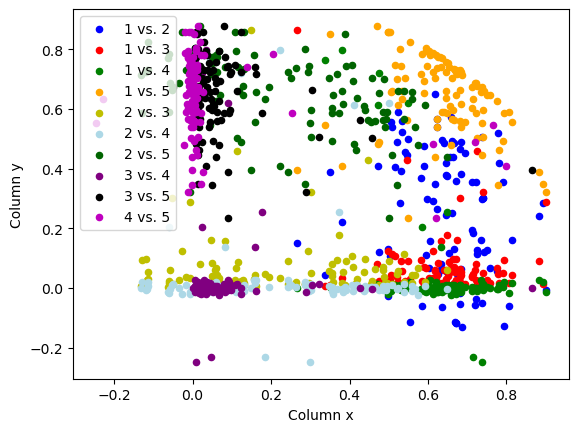

In [74]:
ax = df_normalized.plot(kind="scatter", x="Column1",y="Column2", color="b", label="1 vs. 2")
df_normalized.plot(kind="scatter", x="Column1",y="Column3", color="r", label="1 vs. 3", ax=ax)
df_normalized.plot(kind="scatter", x="Column1",y="Column4", color="g", label="1 vs. 4", ax=ax)
df_normalized.plot(kind="scatter", x="Column1",y="Column5", color="orange", label="1 vs. 5", ax=ax)
df_normalized.plot(kind="scatter", x="Column2",y="Column3", color="y", label="2 vs. 3", ax=ax)
df_normalized.plot(kind="scatter", x="Column2",y="Column4", color="lightblue", label="2 vs. 4", ax=ax)
df_normalized.plot(kind="scatter", x="Column2",y="Column5", color="darkgreen", label="2 vs. 5", ax=ax)
df_normalized.plot(kind="scatter", x="Column3",y="Column4", color="purple", label="3 vs. 4", ax=ax)
df_normalized.plot(kind="scatter", x="Column3",y="Column5", color="black", label="3 vs. 5", ax=ax)
df_normalized.plot(kind="scatter", x="Column4",y="Column5", color="m", label="4 vs. 5", ax=ax)


ax.set_xlabel("Column x")
ax.set_ylabel("Column y")
plt.show()

## 2.2.2 StandardScaler

The Standardscaler is a sklearn scaling technique for standardizing features. It transforms the colums to a feature that the feature has a mean of 0 and a standard deviation of 1. It standardize the values bij substracting the mean of the feature and dividing it by the standard deviation. <br> <br>


> $ x_{standardized} = \frac{{x_{i} - mean(X)}}{{standard_dev(X)}} $ <br> <br>
> $where$ <br>
>> $x_{i}$ is the original feature value <br>
>> $x_{standardized}$ is the standardized feature value <br>
>> $mean(X)$ is the mean of the feature <br>
>> $x_{75}$ is the standard deviation of the feature <br> <br>


By standardizing the features, each feature will have a centered distribution around zero, making the mean of the standardized feature to 0. Another benefit of standardizing is that the relative distance between the datapoints is kept within a feature even though the values are transformed. <br> <br>

As we can see in the plots below, the standardized features has a mean around 0, because they are centered around the same point it is easier to compare the features on a simmilar scaler. The variance = 1 because of (1^2=1) the spread of each feature is also more or less equal. Assuming a columns has a normal distribution, by standardizing this feature it will make a standard normal distribution as seen in column 1 3 and 5 for example. <br>

Some ml algorithms will require the data to have a standard normal distribution, a mean of 0 and a unit variance.

In [75]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

df_sdscaled = standardscaler.fit_transform(df_syntetic)
df_sdscaled = pd.DataFrame(df_sdscaled, columns=df_syntetic.columns)

In [76]:
df_sdscaled.describe()

,Column1,Column2,Column3,Column4,Column5
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-1.156020e-15,-1.698641e-16,1.665335e-17,-1.776357e-17,-7.185919e-16
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.784256e+00,-1.678219e+00,-4.193603e-01,-1.377644e+00,-3.452044e+00
25%,-5.500777e-01,-8.542966e-01,-3.322175e-01,-2.592480e-01,-5.216078e-01
50%,-2.557477e-02,7.387473e-02,-2.154387e-01,-2.241591e-01,2.991343e-01
75%,5.641760e-01,7.271373e-01,-3.358721e-02,-1.872895e-01,7.192772e-01
max,2.164774e+00,1.742047e+00,8.956299e+00,5.503555e+00,1.167458e+00


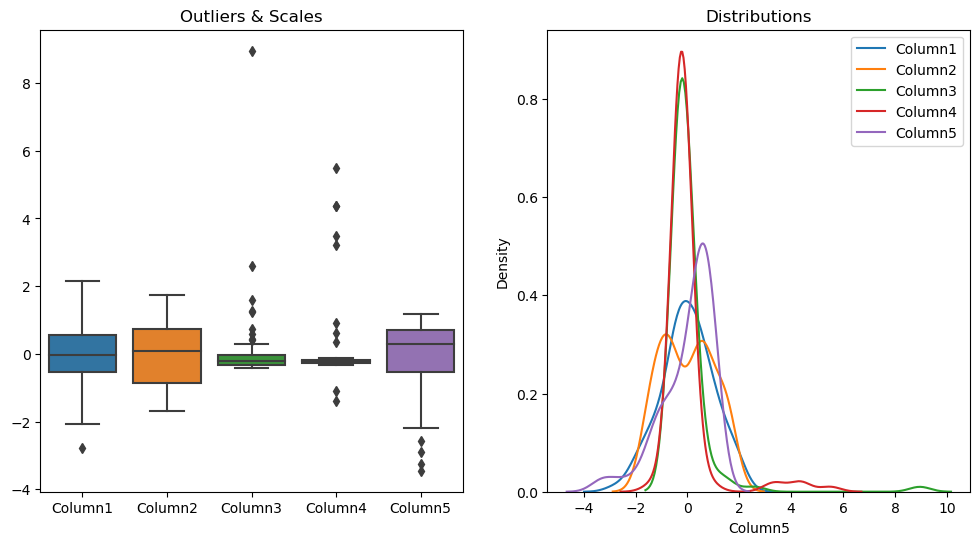

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df_sdscaled, ax=axes[0])
axes[0].set_title('Outliers & Scales')

sns.distplot(df_sdscaled["Column1"], kde=True, label='Column1', hist=False, ax=axes[1])
sns.distplot(df_sdscaled["Column2"], kde=True, label='Column2', hist=False, ax=axes[1])
sns.distplot(df_sdscaled["Column3"], kde=True, label='Column3', hist=False, ax=axes[1])
sns.distplot(df_sdscaled["Column4"], kde=True, label='Column4', hist=False, ax=axes[1])
sns.distplot(df_sdscaled["Column5"], kde=True, label='Column5', hist=False, ax=axes[1])
axes[1].set_title('Distributions')
plt.legend()

plt.show()

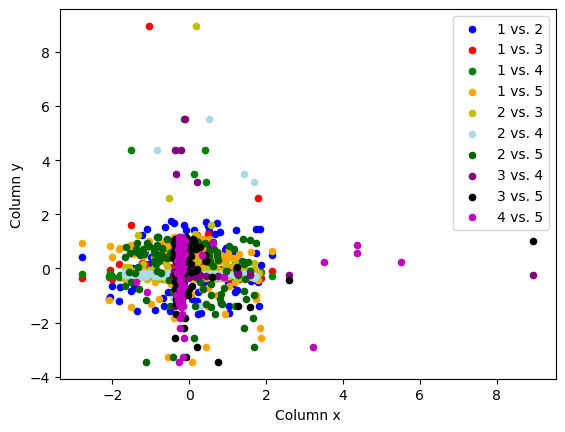

In [78]:
ax = df_sdscaled.plot(kind="scatter", x="Column1",y="Column2", color="b", label="1 vs. 2")
df_sdscaled.plot(kind="scatter", x="Column1",y="Column3", color="r", label="1 vs. 3", ax=ax)
df_sdscaled.plot(kind="scatter", x="Column1",y="Column4", color="g", label="1 vs. 4", ax=ax)
df_sdscaled.plot(kind="scatter", x="Column1",y="Column5", color="orange", label="1 vs. 5", ax=ax)
df_sdscaled.plot(kind="scatter", x="Column2",y="Column3", color="y", label="2 vs. 3", ax=ax)
df_sdscaled.plot(kind="scatter", x="Column2",y="Column4", color="lightblue", label="2 vs. 4", ax=ax)
df_sdscaled.plot(kind="scatter", x="Column2",y="Column5", color="darkgreen", label="2 vs. 5", ax=ax)
df_sdscaled.plot(kind="scatter", x="Column3",y="Column4", color="purple", label="3 vs. 4", ax=ax)
df_sdscaled.plot(kind="scatter", x="Column3",y="Column5", color="black", label="3 vs. 5", ax=ax)
df_sdscaled.plot(kind="scatter", x="Column4",y="Column5", color="m", label="4 vs. 5", ax=ax)


ax.set_xlabel("Column x")
ax.set_ylabel("Column y")
plt.show()

After scaling the distributions of the columns have a mean close to 0. The values are on a simmilar scale.

## 2.2.3 RobustScaler

The RobustScaler is a robust scaling technique. The RobustScaler from sklearn scales features in two steps. First it centers by calculation the median of that column, it substracts the median of each feature value, this gives the centered value. Then the second step is to scale the centered value to a certain range, for the RobustScaler it scales to the IQR (interquartile range), by dividing it by the IQR. This is the range between the 25th percentile (Q1) and the 75th percentile (Q3), this IQR represents the range where the central 50% of the data lies. <br> <br>


> $ x_{scaled} = \frac{{x_{i} - med(x)}}{{x_{75} - x_{25}}} $ <br> <br>
> $where$ <br>
>> $x_{i}$ is the original feature value <br>
>> $x_{scaled}$ is the scaled feature value <br>
>> $med(x)$ is the minimum value of the feature <br>
>> $x_{25}$ is the Q1 value <br>
>> $x_{75}$ is the Q3 value <br> <br>


By scaling the feature with first centering the data using the median and scaling it using the IQR it makes it more robust to outliers. The robustScaler is good to use when the presence of outliers can siqnifcantly inpact the scaling process, when feature are on different scales, and not normally distributed. <br> <br>

As we can see in the boxplots of the syntetic dataset, the datapoints are scaled to a range determined by the IQR (not by min and max) so the outliers dont affect the range of the scaled feature. The datapoints are normally distributed in this range. So the outliers will stay in the dataset and be a bit less big but they don't influence the scaling (lik in minmax). The distribution, shape and skewness of the feature is kept but centered around 0 and not affected by the outliers. <br>

Because RobustScaler uses median and IQR to scale input values, both statistics are resistant to outliers. 

In [79]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

df_rscaled = robustscaler.fit_transform(df_syntetic)
df_rscaled = pd.DataFrame(df_rscaled, columns=df_syntetic.columns)

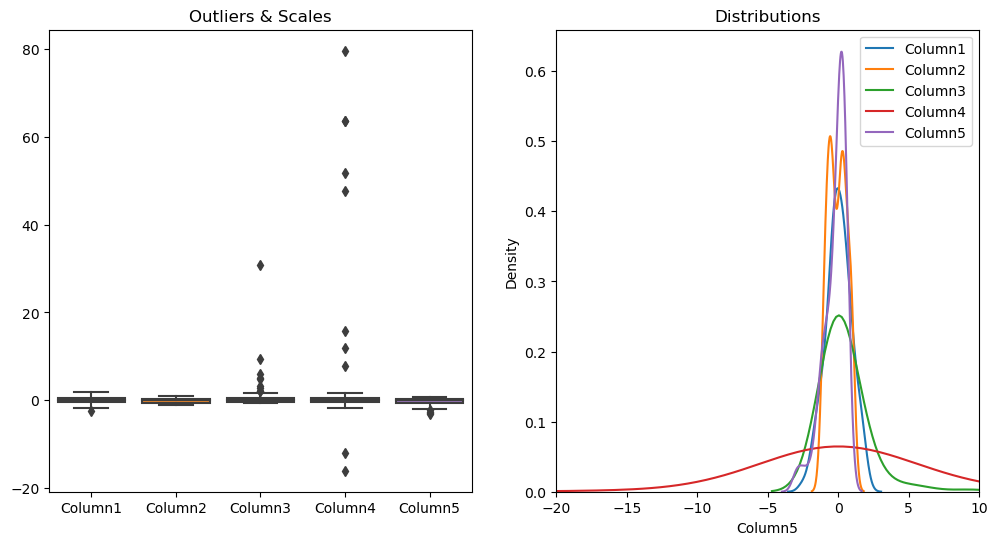

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df_rscaled, ax=axes[0])
axes[0].set_title('Outliers & Scales')

sns.distplot(df_rscaled["Column1"], kde=True, label='Column1', hist=False, ax=axes[1])
sns.distplot(df_rscaled["Column2"], kde=True, label='Column2', hist=False, ax=axes[1])
sns.distplot(df_rscaled["Column3"], kde=True, label='Column3', hist=False, ax=axes[1])
sns.distplot(df_rscaled["Column4"], kde=True, label='Column4', hist=False, ax=axes[1])
sns.distplot(df_rscaled["Column5"], kde=True, label='Column5', hist=False, ax=axes[1])

axes[1].set_title('Distributions')
axes[1].set_xlim(-20, 10)

plt.legend()

plt.show()

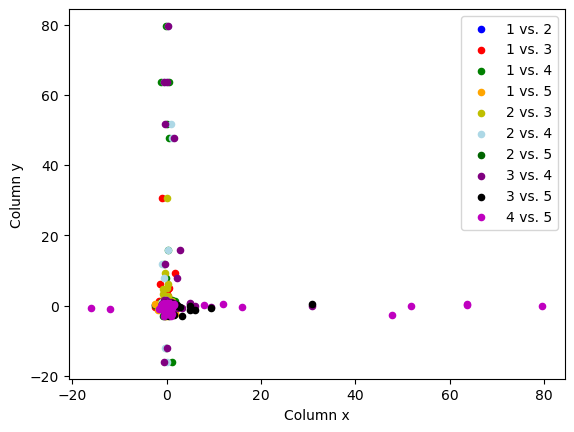

In [81]:
ax = df_rscaled.plot(kind="scatter", x="Column1",y="Column2", color="b", label="1 vs. 2")
df_rscaled.plot(kind="scatter", x="Column1",y="Column3", color="r", label="1 vs. 3", ax=ax)
df_rscaled.plot(kind="scatter", x="Column1",y="Column4", color="g", label="1 vs. 4", ax=ax)
df_rscaled.plot(kind="scatter", x="Column1",y="Column5", color="orange", label="1 vs. 5", ax=ax)
df_rscaled.plot(kind="scatter", x="Column2",y="Column3", color="y", label="2 vs. 3", ax=ax)
df_rscaled.plot(kind="scatter", x="Column2",y="Column4", color="lightblue", label="2 vs. 4", ax=ax)
df_rscaled.plot(kind="scatter", x="Column2",y="Column5", color="darkgreen", label="2 vs. 5", ax=ax)
df_rscaled.plot(kind="scatter", x="Column3",y="Column4", color="purple", label="3 vs. 4", ax=ax)
df_rscaled.plot(kind="scatter", x="Column3",y="Column5", color="black", label="3 vs. 5", ax=ax)
df_rscaled.plot(kind="scatter", x="Column4",y="Column5", color="m", label="4 vs. 5", ax=ax)


ax.set_xlabel("Column x")
ax.set_ylabel("Column y")
plt.show()

## 2.2.4 MinMaxScaler

The MinMaxScaler scales all features to a specific range, typically between 0 and 1. Each feature is scaled based on its own minimum and maximum. <br> <br>


> $ x_{scaled} = \frac{{x_{i} - min(x)}}{{max(x) - min(x)}} $ <br> <br>
> $where$ <br>
>> $x_{i}$ is the original feature value <br>
>> $x_{scaled}$ is the scaled feature value <br>
>> $min(x)$ is the minimum value of the feature <br>
>> $max(x)$ is the maximum value of the feature <br> <br>


The MinMaxScaler is useful when the dataset has features from all different scales, because after scaling they all have a common range no features will dominating others during the learning process. <br> <br>

The MinMaxScaler scales feature values between 0 and 1 based on minimums and maximums in that feature, so the scaling behavior will get affected by outliers. If that feature doesn't contain outliers, the scaler will work as intended and scalings will be evenly distributed across the range. <br>

As we can see in the boxplots diagram of the syntetic dataframe after scaling (below), column 3 has lots of extreme values or high outliers, these outliers have significant impact on the range of the feature. It compresses the majority of the data points of column 3 towards the lower end of the scale (0) because and the outliers will be scaled towards the higher end (1). The not outlier points are squeezed into a narrower range this could result in loss of information. These squeezed in values could make it harder for the model to make destinctions between them. Outliers will retain their relative position in the scaled distribution. <br>

The MinMax scaling process is a lineair transformation that preserves the lineair relationship between the data points. It does not change the shape or skewness of the distribution. <br>

In this type of the dataset it could be more effective to use a RobustScaler because this scaler is less affected by extreme values.

In [82]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()

df_mmscaled = minmaxscaler.fit_transform(df_syntetic)
df_mmscaled = pd.DataFrame(df_mmscaled, columns=df_syntetic.columns)

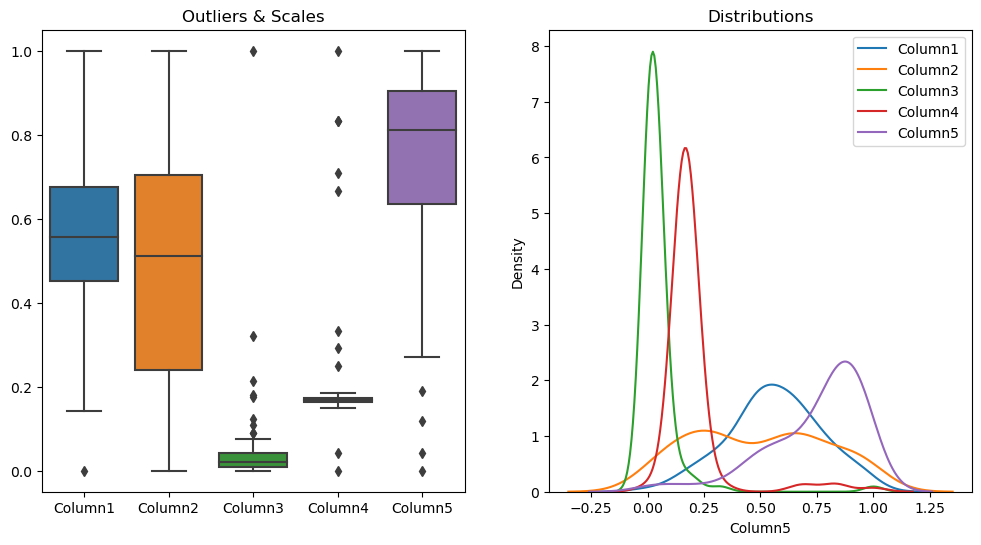

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df_mmscaled, ax=axes[0])
axes[0].set_title('Outliers & Scales')

sns.distplot(df_mmscaled["Column1"], kde=True, label='Column1', hist=False, ax=axes[1])
sns.distplot(df_mmscaled["Column2"], kde=True, label='Column2', hist=False, ax=axes[1])
sns.distplot(df_mmscaled["Column3"], kde=True, label='Column3', hist=False, ax=axes[1])
sns.distplot(df_mmscaled["Column4"], kde=True, label='Column4', hist=False, ax=axes[1])
sns.distplot(df_mmscaled["Column5"], kde=True, label='Column5', hist=False, ax=axes[1])

axes[1].set_title('Distributions')
plt.legend()

plt.show()

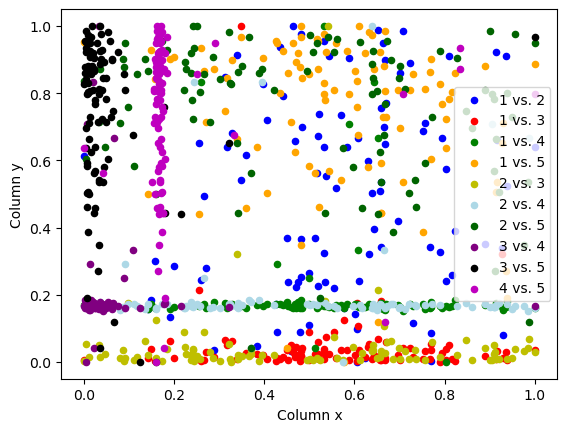

In [84]:
ax = df_mmscaled.plot(kind="scatter", x="Column1",y="Column2", color="b", label="1 vs. 2")
df_mmscaled.plot(kind="scatter", x="Column1",y="Column3", color="r", label="1 vs. 3", ax=ax)
df_mmscaled.plot(kind="scatter", x="Column1",y="Column4", color="g", label="1 vs. 4", ax=ax)
df_mmscaled.plot(kind="scatter", x="Column1",y="Column5", color="orange", label="1 vs. 5", ax=ax)
df_mmscaled.plot(kind="scatter", x="Column2",y="Column3", color="y", label="2 vs. 3", ax=ax)
df_mmscaled.plot(kind="scatter", x="Column2",y="Column4", color="lightblue", label="2 vs. 4", ax=ax)
df_mmscaled.plot(kind="scatter", x="Column2",y="Column5", color="darkgreen", label="2 vs. 5", ax=ax)
df_mmscaled.plot(kind="scatter", x="Column3",y="Column4", color="purple", label="3 vs. 4", ax=ax)
df_mmscaled.plot(kind="scatter", x="Column3",y="Column5", color="black", label="3 vs. 5", ax=ax)
df_mmscaled.plot(kind="scatter", x="Column4",y="Column5", color="m", label="4 vs. 5", ax=ax)


ax.set_xlabel("Column x")
ax.set_ylabel("Column y")
plt.show()

In [85]:
scalers = [None, normalizer, standardscaler, robustscaler, minmaxscaler]

# 2.3 Dataset

The real-world dataset I have choosen is the Heart Diseases UCI dataset. This dataset is suitable for the research as it covers a relevant domain of data and has real-world applications. The dataset contains various numerical features which represents different aspects related to hearth diseases. The numerical features contains different scales, pottentially requiring approriate scaling techniques to ensure the effecienty and acurracy of the various classification algorithms.

In [86]:
df=pd.read_csv("./heart_disease/heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# 2.4 Data Preprocessing

Now, I will proceed to the preprocessing stage of the dataset.
1. Remove the unnecessary columns that do not contribute to the learning objectives and reducing noise.
2. Remove the missing values of the dataset, by remove each row/sample that contains a missing value for a feature.
3. For simplicty I will change this multi-class classification task to a binary classification problem for simplicty (heart disease and no heart disease).
4. Split the dataset into two seperate dataframes 'X' containing the input instances and 'y' containing the binary classification label.
5. For the categorical features, I will use one-hot encoding to convert them to numerical valued representations. <br>
> Note: normally you would split into training and testing set and scale both proportions of the dataset, i will apply them in the upcoming section of the research report 

In [87]:
# data cleaning
df.drop(['id','dataset'],axis=1,inplace=True)

In [88]:
# missing values
print(df.isnull().sum().sum())
df = df.dropna()
print(df.isnull().sum().sum())

1759
0


In [89]:
# binary label
print(df.shape)
print(df['num'].value_counts())
df['num'] = ((df['num'] > 0)*1).copy()
print('Binary:\n',df['num'].value_counts())

(299, 14)
0    160
1     56
2     35
3     35
4     13
Name: num, dtype: int64
Binary:
 0    160
1    139
Name: num, dtype: int64


In [90]:
# label column
X = df.drop('num',axis=1)
y = df.num

In [91]:
print(X.head())
print(y.head())

   age     sex               cp  trestbps   chol    fbs         restecg  \
0   63    Male   typical angina     145.0  233.0   True  lv hypertrophy   
1   67    Male     asymptomatic     160.0  286.0  False  lv hypertrophy   
2   67    Male     asymptomatic     120.0  229.0  False  lv hypertrophy   
3   37    Male      non-anginal     130.0  250.0  False          normal   
4   41  Female  atypical angina     130.0  204.0  False  lv hypertrophy   

   thalch  exang  oldpeak        slope   ca               thal  
0   150.0  False      2.3  downsloping  0.0       fixed defect  
1   108.0   True      1.5         flat  3.0             normal  
2   129.0   True      2.6         flat  2.0  reversable defect  
3   187.0  False      3.5  downsloping  0.0             normal  
4   172.0  False      1.4    upsloping  0.0             normal  
0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int32


In [92]:
# Different categorical features
columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']

for column in columns:
    distinct_values = X[column].unique()
    print(f"Distinct values of column '{column}':")
    print(distinct_values)
    print()

Distinct values of column 'sex':
['Male' 'Female']

Distinct values of column 'cp':
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']

Distinct values of column 'fbs':
[True False]

Distinct values of column 'restecg':
['lv hypertrophy' 'normal' 'st-t abnormality']

Distinct values of column 'exang':
[False True]

Distinct values of column 'slope':
['downsloping' 'flat' 'upsloping']

Distinct values of column 'thal':
['fixed defect' 'normal' 'reversable defect']

Distinct values of column 'ca':
[0. 3. 2. 1.]



In [93]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

columns_to_encode = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']

#for column in columns_to_encode:
#    X[column] = enc.fit_transform(X[column])
for column in columns_to_encode:
    dum = pd.get_dummies(X[column])
    X = pd.concat([X, dum], axis=1)
    X.drop(column, axis=1, inplace=True)

In [94]:
X.head()

,age,trestbps,chol,thalch,oldpeak,Female,Male,asymptomatic,atypical angina,non-anginal,...,downsloping,flat,upsloping,fixed defect,normal,reversable defect,0.0,1.0,2.0,3.0
0,63,145.0,233.0,150.0,2.3,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1,67,160.0,286.0,108.0,1.5,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
2,67,120.0,229.0,129.0,2.6,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,37,130.0,250.0,187.0,3.5,0,1,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,41,130.0,204.0,172.0,1.4,1,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0


In [95]:
new_column_names = {0.0: 'ca0', 1.0: 'ca1', 2.0: 'ca2', 3.0: 'ca3'}
X.rename(columns=new_column_names, inplace=True)

In [96]:
X.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'Female', 'Male',
       'asymptomatic', 'atypical angina', 'non-anginal', 'typical angina',
       'ca0', 'ca1', 'lv hypertrophy', 'normal', 'st-t abnormality', 'ca0',
       'ca1', 'downsloping', 'flat', 'upsloping', 'fixed defect', 'normal',
       'reversable defect', 'ca0', 'ca1', 'ca2', 'ca3'],
      dtype='object')

In [97]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# 2.5 Data analysis 

In [98]:
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

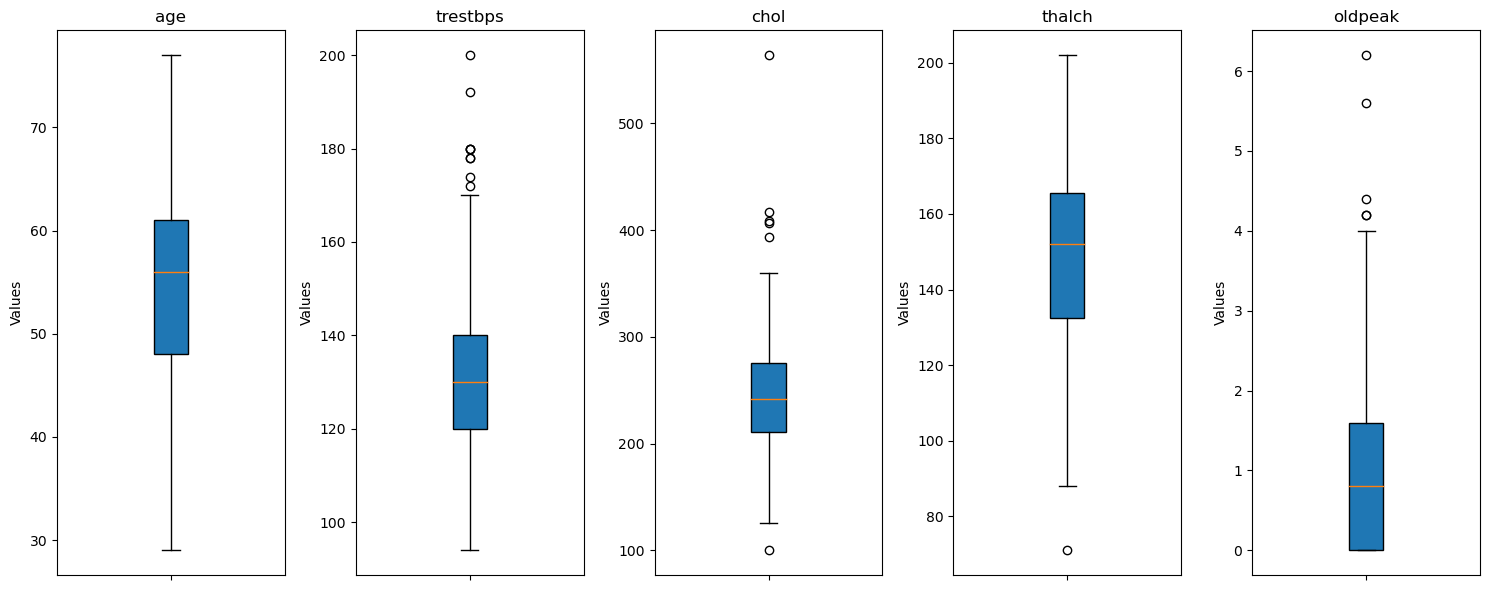

In [99]:
fig, axs = plt.subplots(1, len(num_cols), figsize=(15, 6))

for i, col in enumerate(num_cols):
    boxplot = axs[i].boxplot(X[col], vert=True, patch_artist=True)

    axs[i].set_title(col)
    axs[i].set_xticklabels([''])
    axs[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

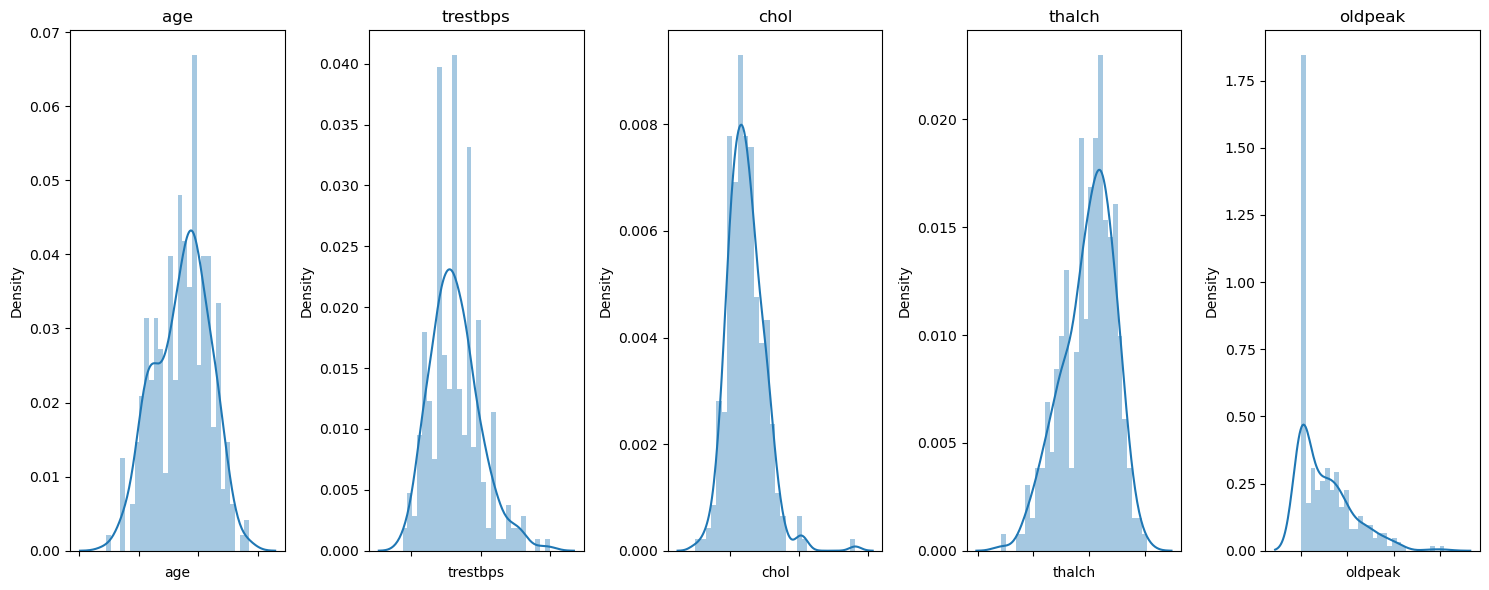

In [100]:
fig, axs = plt.subplots(1, len(num_cols), figsize=(15, 6))

for i, col in enumerate(num_cols):
    sns.distplot(X[col], bins=30, ax=axs[i])

    axs[i].set_title(col)
    axs[i].set_xticklabels([''])
    axs[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

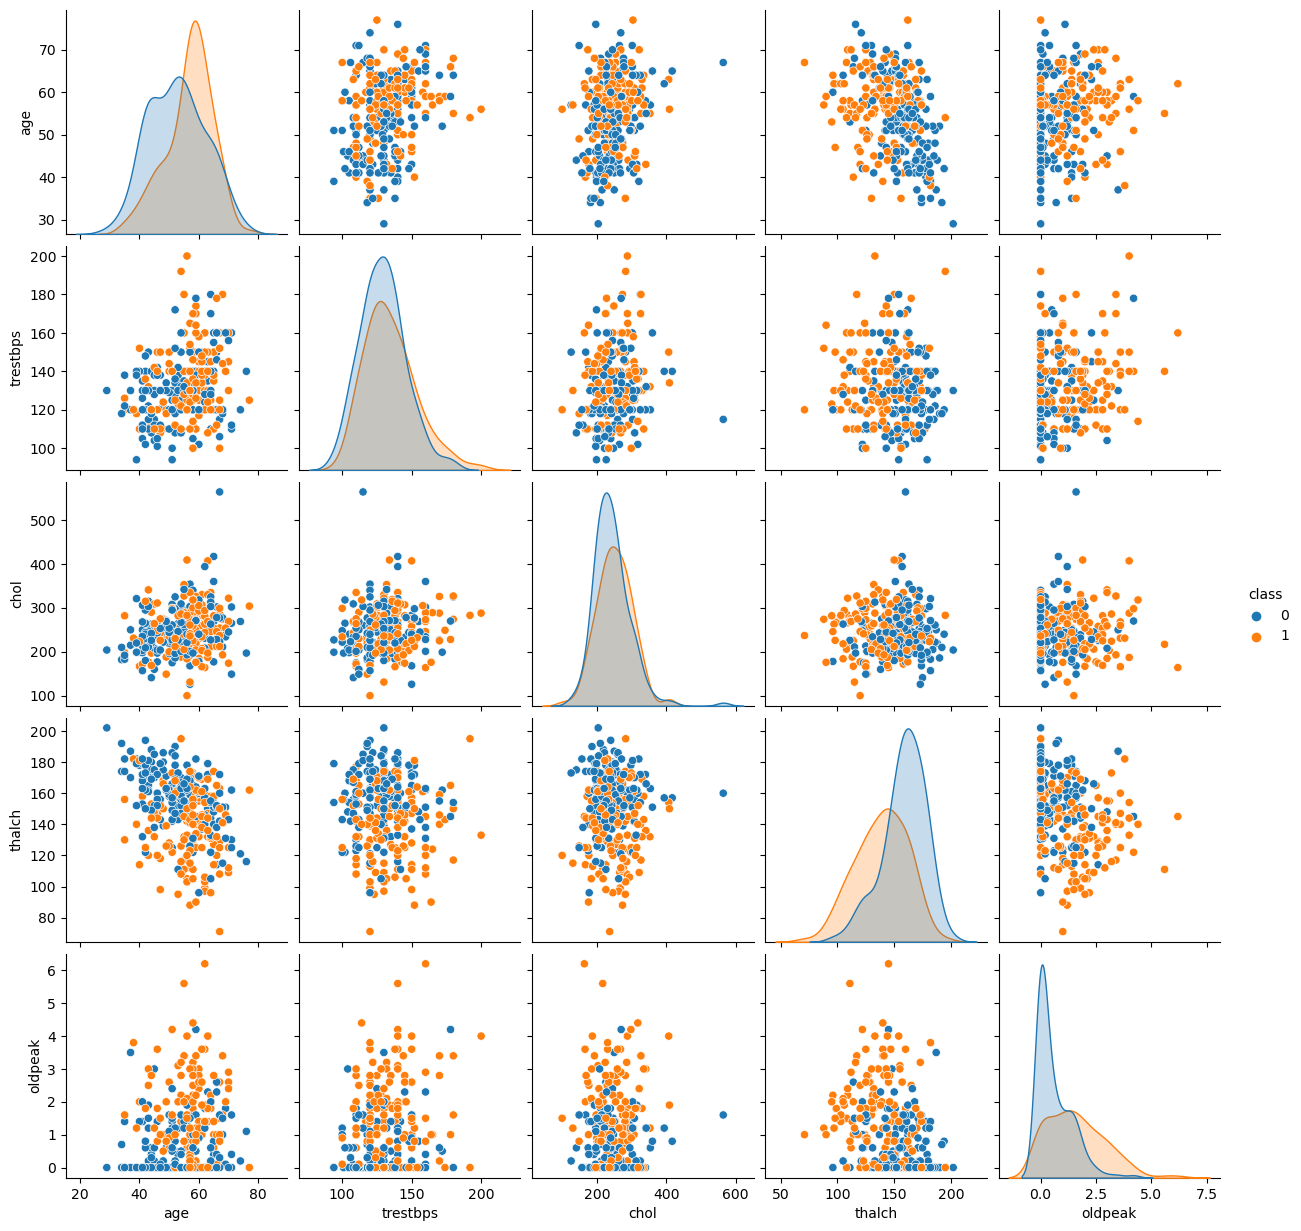

In [101]:
df_plot = df[num_cols].copy()
df_plot['class'] = y

sns.pairplot(df_plot, hue='class')
plt.show()

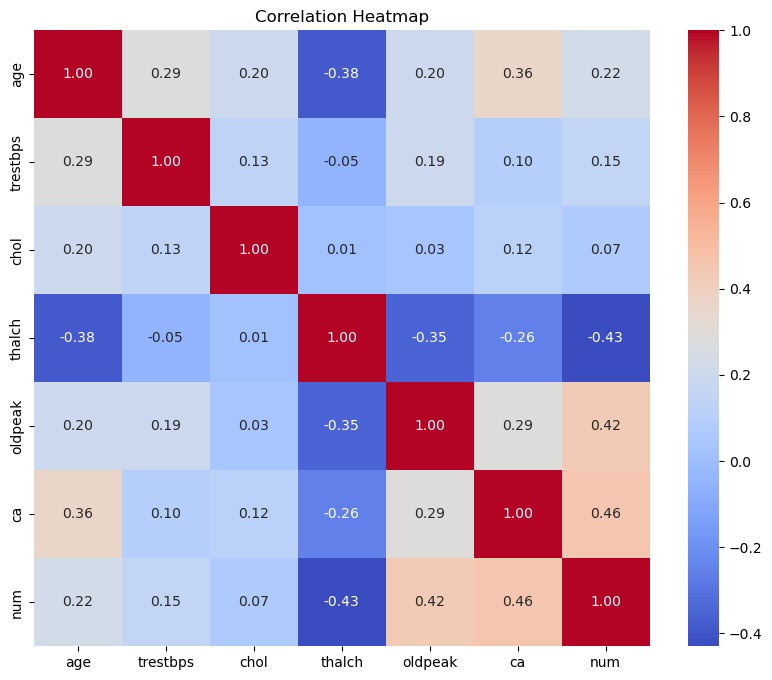

In [102]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')

plt.show()

# 2.6. Train/test split

In [103]:
X_train = X
y_train = y

I won't split the datset into a fixed training set and testing set, instead I will be using cross-validation to assess the performance accuracy of the classification algorithms. This approach has advantage to use the entire dataset for both training and testing, specially 8-folds will be applied, where the dataset is divided in 8 subsets. The models will be trained and evaluated 8 times each time using a different subset. The average will be computed across the 8 folds, to examine the consistency of the models accuracy. This provides a more robust estimate of the models accuracy.

Distributions of the numerical values per scaler:

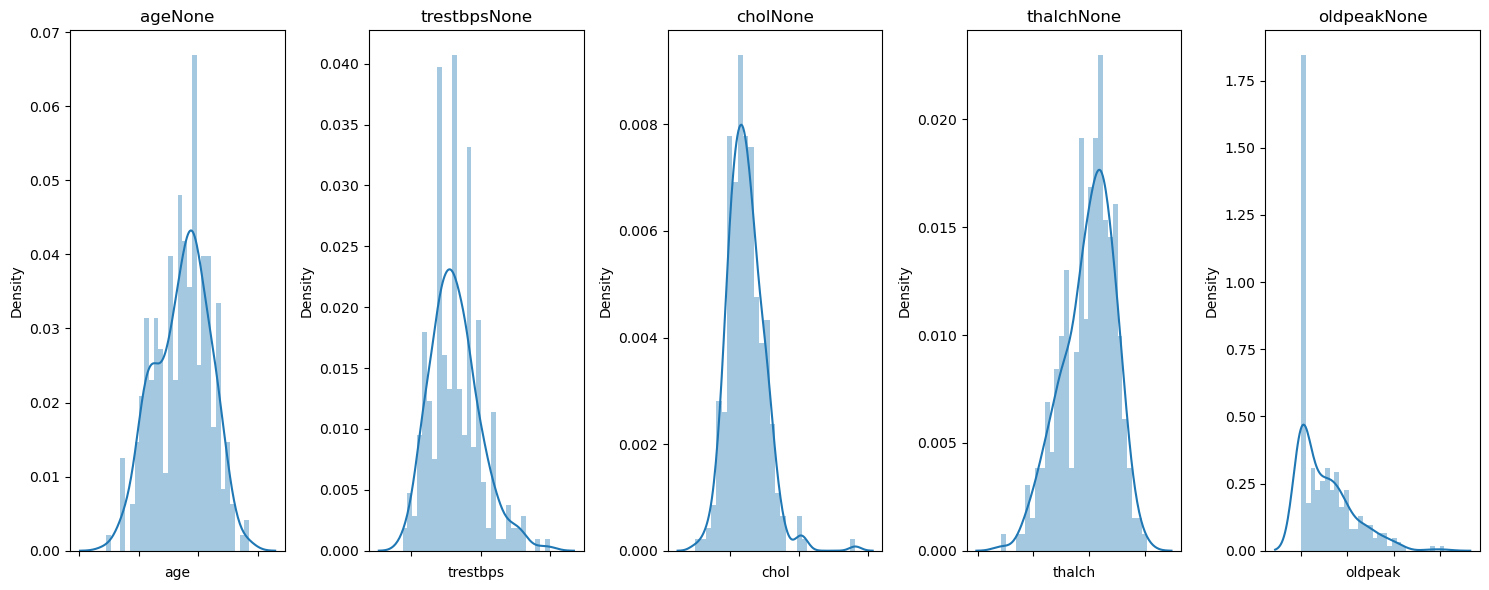

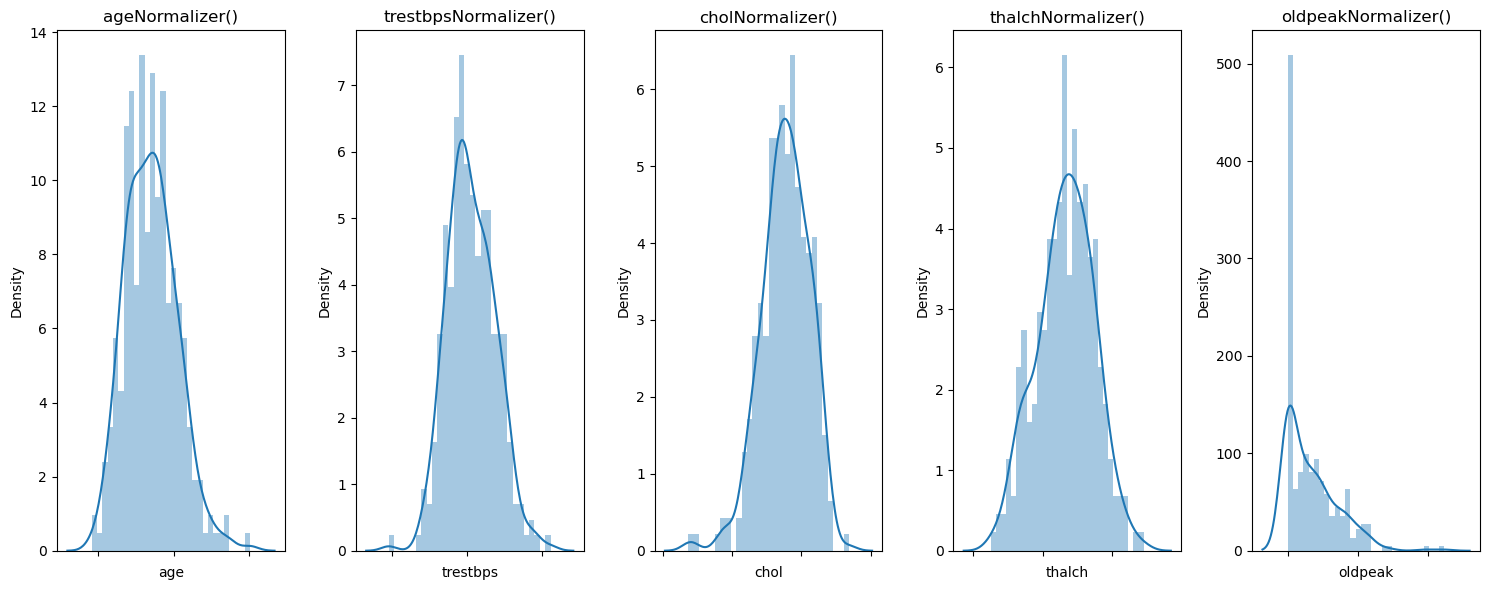

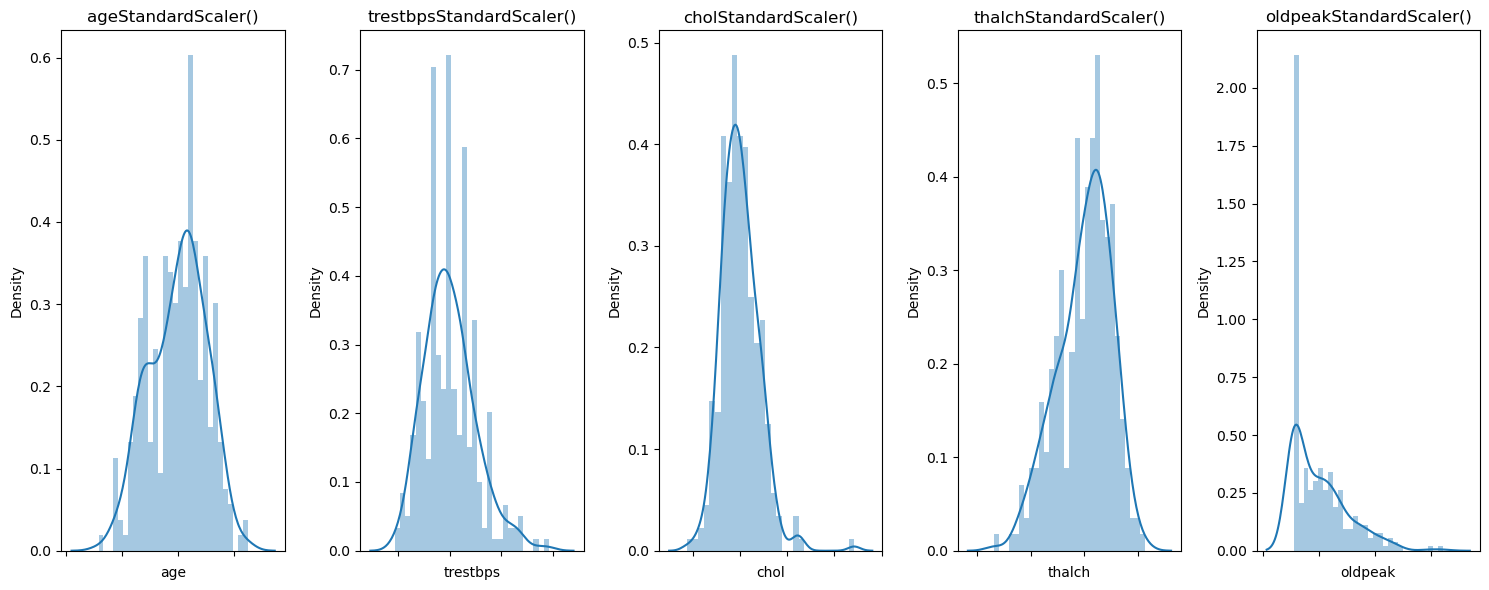

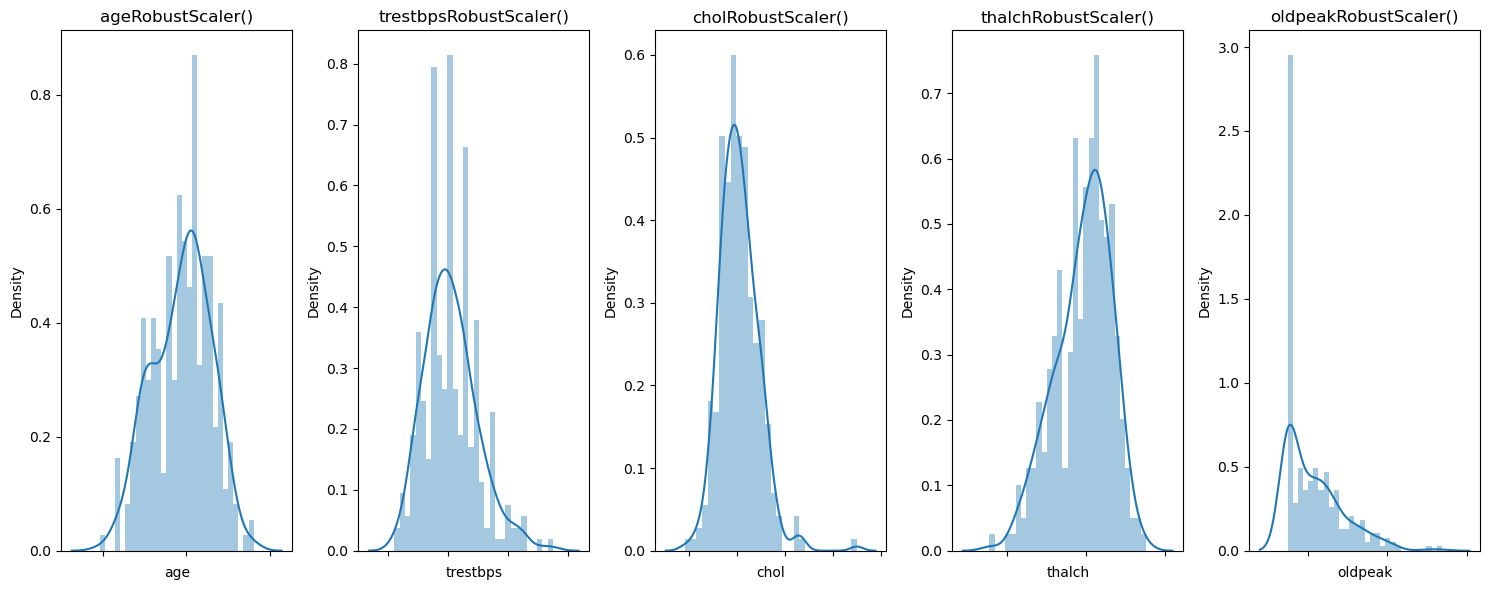

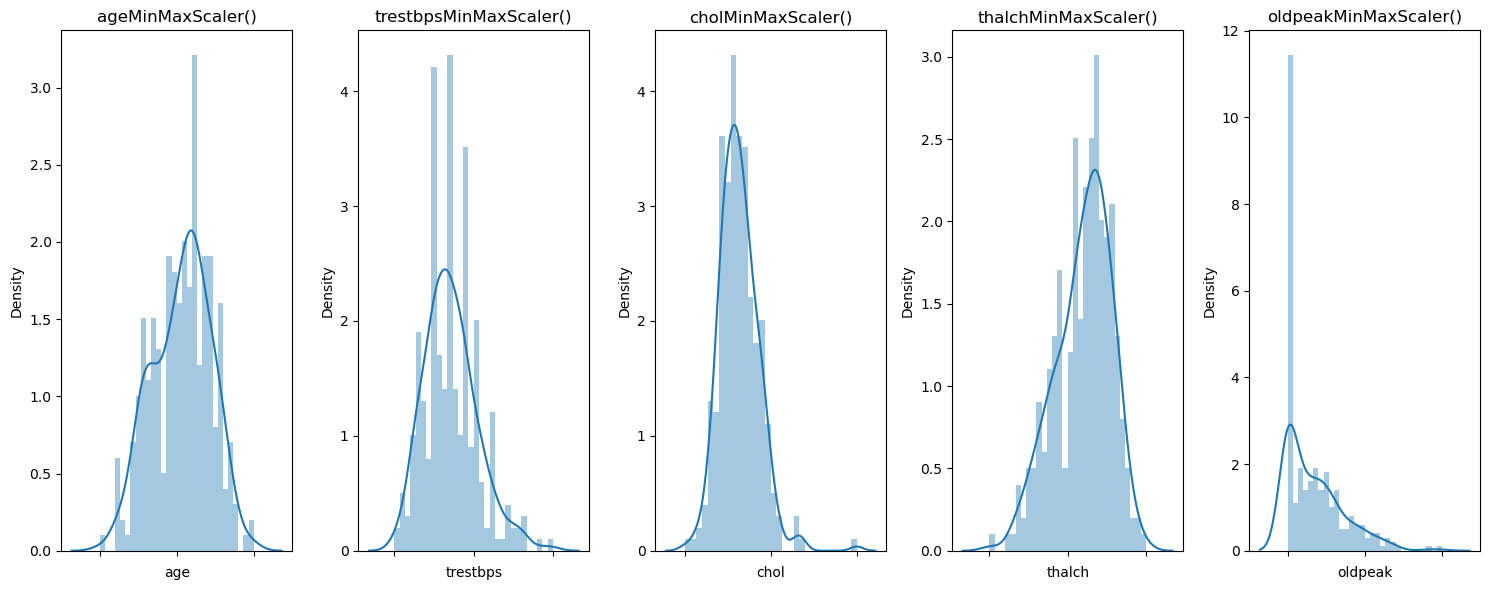

In [104]:
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

for scaler in scalers:
    if scaler is not None:
        X_train_scaled = scaler.fit_transform(X_train)
        #X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        #X_test_scaled = X_test
        
    df_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
    
    fig, axs = plt.subplots(1, len(num_cols), figsize=(15, 6))
    
    
    for i, col in enumerate(num_cols):
        title = str(col) + str(scaler)
        sns.distplot(df_scaled[col], bins=30, ax=axs[i])
        axs[i].set_title(title)
        axs[i].set_xticklabels([''])
        axs[i].set_ylabel('Density')

    plt.tight_layout()
    plt.show()

# 2.7 Models (experimental setup)

These types of classification algortihms are widely used and exhibit varying sensitivities to feature scaling.
- Tree based classification algorithms: decision trees (in depth discussion) & random forest
- Distance based classification algorithms: KNN (in depth discussion) & SVM
- Descent based classification algorithms: logistic regression (in depth discussion) & SVM with linear kernel<br>
The next function will be used to automatically run a classifier with each scaler, the results will be added to a dataframe.

To measure the convergence speed of the different classifiers, we will use a metric that measures the iterations or estimators required for the classifier to converge during the training process. <br>
In the next function it first chacks if the classifier has a "max_iter" attricute. If it does, it means the classifier is iterative and has a maximum number of iterations defined. <br>
If the classifier does not have a "max_iter" atrribute but it has a "n_estimators" attribute, it suggests the classifier is an ensemble method (decision trees) for convergence. <br>
If the classifier does not have on of these attribute, the convergence speed won't be measured.

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
import time

def train_classifier(classifier, scaler):
    if scaler is not None:
        X_train_scaled = scaler.fit_transform(X_train)
    else:
        X_train_scaled = X_train
    
    scores = cross_val_score(classifier, X_train_scaled, y_train, cv=8)
    print(classifier,scaler)    
    print('Cross-validated accuracies:',':', [round(score * 100, 2) for score in scores], 'mean:', round(scores.mean(),2)*100,'%')
    

    if hasattr(classifier, 'max_iter'):
        start_time = time.time()
        classifier.fit(X_train_scaled, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        print('Convergence Iterations:', classifier.n_iter_)
        print('Training Time:', training_time, 'seconds')
        x = classifier.n_iter_
        y = 'iterations'
    elif hasattr(classifier, 'n_estimators'):
        start_time = time.time()
        classifier.fit(X_train_scaled, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        print('Number of Estimators:', classifier.n_estimators)
        print('Training Time:', training_time, 'seconds')
        x = classifier.n_estimators
        y = 'estimators'
    else:
        start_time = time.time()
        classifier.fit(X_train_scaled, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        print('Training Time:', training_time, 'seconds')
        x = 'none'
        y = ''
        
    r = {
        'Classifier': str(classifier),
        'Scaler': str(scaler),
        'cv score': scores,
        'Mean Accuracy': round(scores.mean(),2)*100,
        'Speed': str(x) + y}
        #'Training Time': training_time}
    return r

In [106]:
results = []

## 2.7.1 Tree-Based

In [107]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()

for scaler in scalers:
    results.append(train_classifier(decisiontree, scaler))

DecisionTreeClassifier() None
Cross-validated accuracies: : [78.95, 68.42, 92.11, 78.38, 67.57, 67.57, 75.68, 75.68] mean: 76.0 %
Training Time: 0.002004861831665039 seconds
DecisionTreeClassifier() Normalizer()
Cross-validated accuracies: : [78.95, 71.05, 92.11, 81.08, 54.05, 75.68, 62.16, 75.68] mean: 74.0 %
Training Time: 0.001996755599975586 seconds
DecisionTreeClassifier() StandardScaler()
Cross-validated accuracies: : [73.68, 71.05, 86.84, 75.68, 64.86, 70.27, 75.68, 78.38] mean: 75.0 %
Training Time: 0.0019903182983398438 seconds
DecisionTreeClassifier() RobustScaler()
Cross-validated accuracies: : [84.21, 71.05, 89.47, 78.38, 64.86, 70.27, 75.68, 75.68] mean: 76.0 %
Training Time: 0.001995563507080078 seconds
DecisionTreeClassifier() MinMaxScaler()
Cross-validated accuracies: : [84.21, 71.05, 86.84, 75.68, 64.86, 70.27, 78.38, 75.68] mean: 76.0 %
Training Time: 0.0 seconds


In [108]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()

for scaler in scalers:
    results.append(train_classifier(randomforest, scaler))

RandomForestClassifier() None
Cross-validated accuracies: : [89.47, 71.05, 92.11, 86.49, 72.97, 78.38, 75.68, 89.19] mean: 82.0 %
Number of Estimators: 100
Training Time: 0.14438867568969727 seconds
RandomForestClassifier() Normalizer()
Cross-validated accuracies: : [89.47, 81.58, 89.47, 86.49, 75.68, 81.08, 70.27, 86.49] mean: 83.0 %
Number of Estimators: 100
Training Time: 0.18239283561706543 seconds
RandomForestClassifier() StandardScaler()
Cross-validated accuracies: : [89.47, 71.05, 89.47, 89.19, 78.38, 72.97, 75.68, 86.49] mean: 82.0 %
Number of Estimators: 100
Training Time: 0.1497340202331543 seconds
RandomForestClassifier() RobustScaler()
Cross-validated accuracies: : [89.47, 73.68, 94.74, 86.49, 75.68, 75.68, 75.68, 89.19] mean: 83.0 %
Number of Estimators: 100
Training Time: 0.11193323135375977 seconds
RandomForestClassifier() MinMaxScaler()
Cross-validated accuracies: : [89.47, 73.68, 94.74, 86.49, 72.97, 75.68, 75.68, 91.89] mean: 83.0 %
Number of Estimators: 100
Training 

See next section for discussion.

## 2.7.2 Distance-based

In [109]:
from sklearn import svm
svm = svm.SVC()

for scaler in scalers:
    results.append(train_classifier(svm, scaler))

SVC() None
Cross-validated accuracies: : [68.42, 60.53, 65.79, 78.38, 62.16, 67.57, 59.46, 67.57] mean: 66.0 %
Convergence Iterations: [143]
Training Time: 0.003947257995605469 seconds
SVC() Normalizer()
Cross-validated accuracies: : [60.53, 57.89, 65.79, 83.78, 67.57, 67.57, 64.86, 56.76] mean: 66.0 %
Convergence Iterations: [136]
Training Time: 0.003997087478637695 seconds
SVC() StandardScaler()
Cross-validated accuracies: : [89.47, 86.84, 94.74, 81.08, 72.97, 81.08, 75.68, 83.78] mean: 83.0 %
Convergence Iterations: [230]
Training Time: 0.004534244537353516 seconds
SVC() RobustScaler()
Cross-validated accuracies: : [89.47, 76.32, 94.74, 83.78, 78.38, 78.38, 78.38, 86.49] mean: 83.0 %
Convergence Iterations: [225]
Training Time: 0.006364107131958008 seconds
SVC() MinMaxScaler()
Cross-validated accuracies: : [84.21, 84.21, 89.47, 83.78, 72.97, 83.78, 72.97, 91.89] mean: 83.0 %
Convergence Iterations: [198]
Training Time: 0.00399017333984375 seconds


In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

for scaler in scalers:
    results.append(train_classifier(knn, scaler))

KNeighborsClassifier(n_neighbors=4) None
Cross-validated accuracies: : [nan, nan, nan, nan, nan, nan, nan, nan] mean: nan %
Training Time: 0.002000570297241211 seconds
KNeighborsClassifier(n_neighbors=4) Normalizer()
Cross-validated accuracies: : [nan, nan, nan, nan, nan, nan, nan, nan] mean: nan %
Training Time: 0.0 seconds
KNeighborsClassifier(n_neighbors=4) StandardScaler()
Cross-validated accuracies: : [nan, nan, nan, nan, nan, nan, nan, nan] mean: nan %
Training Time: 0.0 seconds
KNeighborsClassifier(n_neighbors=4) RobustScaler()
Cross-validated accuracies: : [nan, nan, nan, nan, nan, nan, nan, nan] mean: nan %
Training Time: 0.0 seconds
KNeighborsClassifier(n_neighbors=4) MinMaxScaler()
Cross-validated accuracies: : [nan, nan, nan, nan, nan, nan, nan, nan] mean: nan %
Training Time: 0.0 seconds


See next section for discussion.

## 2.7.3 Descend-based

In [111]:
from sklearn import svm
svm = svm.SVC(kernel='linear')

for scaler in scalers:
    results.append(train_classifier(svm, scaler))

SVC(kernel='linear') None
Cross-validated accuracies: : [86.84, 78.95, 89.47, 83.78, 72.97, 83.78, 78.38, 83.78] mean: 82.0 %
Convergence Iterations: [1528021]
Training Time: 0.27017974853515625 seconds
SVC(kernel='linear') Normalizer()
Cross-validated accuracies: : [60.53, 55.26, 68.42, 70.27, 62.16, 59.46, 62.16, 59.46] mean: 62.0 %
Convergence Iterations: [142]
Training Time: 0.005979299545288086 seconds
SVC(kernel='linear') StandardScaler()
Cross-validated accuracies: : [86.84, 78.95, 89.47, 83.78, 70.27, 81.08, 75.68, 81.08] mean: 81.0 %
Convergence Iterations: [19708]
Training Time: 0.006005048751831055 seconds
SVC(kernel='linear') RobustScaler()
Cross-validated accuracies: : [86.84, 76.32, 89.47, 83.78, 72.97, 83.78, 75.68, 83.78] mean: 82.0 %
Convergence Iterations: [1487]
Training Time: 0.0020029544830322266 seconds
SVC(kernel='linear') MinMaxScaler()
Cross-validated accuracies: : [86.84, 84.21, 86.84, 86.49, 81.08, 81.08, 70.27, 86.49] mean: 83.0 %
Convergence Iterations: [62

In [112]:
from sklearn import linear_model
lm = linear_model.LogisticRegression()

for scaler in scalers:
    results.append(train_classifier(lm, scaler))

LogisticRegression() None
Cross-validated accuracies: : [86.84, 84.21, 92.11, 94.59, 72.97, 83.78, 81.08, 83.78] mean: 85.0 %
Convergence Iterations: [100]
Training Time: 0.01203775405883789 seconds
LogisticRegression() Normalizer()
Cross-validated accuracies: : [63.16, 57.89, 65.79, 81.08, 64.86, 67.57, 62.16, 59.46] mean: 65.0 %
Convergence Iterations: [19]
Training Time: 0.0020029544830322266 seconds
LogisticRegression() StandardScaler()
Cross-validated accuracies: : [89.47, 81.58, 92.11, 89.19, 75.68, 81.08, 78.38, 83.78] mean: 84.0 %
Convergence Iterations: [16]
Training Time: 0.002000093460083008 seconds
LogisticRegression() RobustScaler()
Cross-validated accuracies: : [86.84, 84.21, 92.11, 89.19, 75.68, 83.78, 81.08, 86.49] mean: 85.0 %
Convergence Iterations: [27]
Training Time: 0.003996133804321289 seconds
LogisticRegression() MinMaxScaler()
Cross-validated accuracies: : [86.84, 84.21, 92.11, 86.49, 78.38, 83.78, 75.68, 86.49] mean: 84.0 %
Convergence Iterations: [38]
Training

See next section for discussion.

# 2.8 Results & conclusion

In [113]:
df_results = pd.DataFrame(results)

## Tree-based algorithm: DecisionTrees in depth

In [114]:
df_results.loc[df_results['Classifier'] == 'DecisionTreeClassifier()']

,Classifier,Scaler,cv score,Mean Accuracy,Speed
0,DecisionTreeClassifier(),None,"[0.7894736842105263, 0.6842105263157895, 0.921...",76.0,none
1,DecisionTreeClassifier(),Normalizer(),"[0.7894736842105263, 0.7105263157894737, 0.921...",74.0,none
2,DecisionTreeClassifier(),StandardScaler(),"[0.7368421052631579, 0.7105263157894737, 0.868...",75.0,none
3,DecisionTreeClassifier(),RobustScaler(),"[0.8421052631578947, 0.7105263157894737, 0.894...",76.0,none
4,DecisionTreeClassifier(),MinMaxScaler(),"[0.8421052631578947, 0.7105263157894737, 0.868...",76.0,none


How decision trees work:
> The decision tree classification algorithm is a machine learning technique used for both classification and regression tasks. Its purpose is to construct a model that can make predictions by learning straightforward decision rules derived from the training data. An decision tree generated by the algorithm consists of nodes and branches, with each node representing a specific feature. The outgoing branches from each node depict the possible outcomes or values associated with that feature. The order in which nodes and features are selected for splitting is determined by the information gain of each feature. Each branch represents a type of threshold. As the algorithm progresses, each node acts as a decision point, where the training data is divided based on a particular feature value or condition. This process of splitting continues recursively, creating new branches and nodes, until the data instances reach the leaf nodes of the tree. The leaf nodes gives the final outcomes or predictions made by the decision tree. At each leaf node, an example is classified with the appropriate label.

From the results we can see that the Decision Trees Model does not get significant improvements in terms of accuracy when applying different scalers. This can be attributed to the characteristics of tree-based classifiers (like decision trees and random forest). These types of algorithms can handle features with varying scales without requiring explicit data scaling or normalization. <br><br>
Tree-based classifications make decision by repeatly partitioning the feature space using thresholds, these thresholds are determined by comparing feature values to find the optimal split point that maximizes a specific critera, such as the information gain. The decision making processes are based on if then else structure, considering all possible splits. Tree-based algoirthms are also non-parametric so meaning they do not asume any specific form or underlying distribution of the data. This makes it more flexible to work with different scaled features. For random forest Classifier it is the same as decision tree because it is an ensemble learning of decision trees that combines multiple decision trees. <br><br>
Regarding convergence speed, the decision trees model does not involve iterative processes, and therefore the concept of convergence doess not apply. Convergence refers to finding iterativly the best parameters for an optimization, we won't get any convergence speed for decision trees. That's why there is a "none" in the column of speed. <br><br>

Conclusion: based on the results and the characteristics of tree-based classifiers, it can be confirmed that scaling isn't necessary to do when working with tree-based classifiers.

## Distance-based algorithms: KNN

In [115]:
df_results.loc[df_results['Classifier'] == 'KNeighborsClassifier(n_neighbors=4)']

,Classifier,Scaler,cv score,Mean Accuracy,Speed
15,KNeighborsClassifier(n_neighbors=4),None,"[nan, nan, nan, nan, nan, nan, nan, nan]",NaN,none
16,KNeighborsClassifier(n_neighbors=4),Normalizer(),"[nan, nan, nan, nan, nan, nan, nan, nan]",NaN,none
17,KNeighborsClassifier(n_neighbors=4),StandardScaler(),"[nan, nan, nan, nan, nan, nan, nan, nan]",NaN,none
18,KNeighborsClassifier(n_neighbors=4),RobustScaler(),"[nan, nan, nan, nan, nan, nan, nan, nan]",NaN,none
19,KNeighborsClassifier(n_neighbors=4),MinMaxScaler(),"[nan, nan, nan, nan, nan, nan, nan, nan]",NaN,none


How KNN classifier works: 
> The k-Nearest Neighbors (k-NN) classification algorithm is a machine learning technique used for both classification and regression tasks. It aims to construct a model that can make predictions by learning from the proximity of training data points in the feature space. <br>
In the k-NN algorithm, each data point is represented in a multidimensional feature space, where each dimension corresponds to a specific feature. The algorithm classifies new instances by measuring the similarity between the new instance and the existing training instances. This similarity is typically calculated using a distance metric such as Euclidean distance.<br>
The core idea of the k-NN algorithm is to find the k nearest neighbors of a given test instance in the feature space based on the distance metric. The value of k is a parameter that determines the number of neighbors to consider. Once the nearest neighbors are identified, the algorithm assigns a class label to the test instance based on the class labels of its k nearest neighbors.

From the results we can see that the KNN classifications accuracy has been significantly affected by using scaling techniques, like StandardScaler, RobustScaler and MinMaxScaler. This because these scalers normalize the data in a way that preserves the relative distances between the samples and takes into account the statistical properties of the features. KNN relies on the distances between samples to determine nearest neighbors. (81.71% average) StandardScaler, RobustScaler and MinMaxScaler normalize the data and bring the features to a common scale. By scaling the features, the scalers ensure that the distances calculated by KNN are based on comparable and meaningful values. Because they are all on the same scale KNN leads to a more accurate selection of the nearest neighbors, which leads to improved classification accuracy. <br><br>
When features all have different scales this not good for KNN accuracy (as we see for no scaler 64%), this because the distances that are calculated by KNN are heavily influenced by the features with larger scales. They tend to dominate the distance calculations and have a bad impact on the nearest neighbors selection. So bringing back to the same scale is needed, because otherwise as we see it leads to inaccurate classification as the algorithm prioritize features with larger scales over the features with smaller scales. <br><br>
Using the Normalize from Sklearn, it seems it does the accuracy not good. Normalizer() scales the rows individually to have a unit norm (as seen before), KNN is based on distances of feature values not on sample norms. It doesn't preserves the original relationship between features and can disort the distance calculations in a way that is not beneficial for KNN. <br>

Convergence speed in terms of estimators/iterations for KNN is none, because KNN is no iterative algorithm, and doesnt apply to the concept of convergence speed as here defined. <br>

Conclusion: for distance-based algorithms it is always a crucial step to normalize the features to a same scale using StandardScaler, MinMaxScaler or RobustScaler. They are effective for KNN because of preserving the relationships between features and reducing the impact of outliers. The choice of scaler should be determined by the characteristics of the dataset. Normalizer() is not suitable for distance-based algorithms because it doesn't preserve the relationship of between the features in selection of nearest neighbors. There is not a significant difference between the three scalers accuracy.

## Gradient Descent algorithm: LogisticRegression

In [116]:
df_results.loc[df_results['Classifier'] == "LogisticRegression()"]

,Classifier,Scaler,cv score,Mean Accuracy,Speed
25,LogisticRegression(),None,"[0.868421052631579, 0.8421052631578947, 0.9210...",85.0,[100]iterations
26,LogisticRegression(),Normalizer(),"[0.631578947368421, 0.5789473684210527, 0.6578...",65.0,[19]iterations
27,LogisticRegression(),StandardScaler(),"[0.8947368421052632, 0.8157894736842105, 0.921...",84.0,[16]iterations
28,LogisticRegression(),RobustScaler(),"[0.868421052631579, 0.8421052631578947, 0.9210...",85.0,[27]iterations
29,LogisticRegression(),MinMaxScaler(),"[0.868421052631579, 0.8421052631578947, 0.9210...",84.0,[38]iterations


How Logistic Regression works: 
> See question 1

As we can see from the accuracy mean of the 5 cross-validation folds for the LogisticRegression; no scaler, StandardScaler, RobustScaler and MinMaxScaler has the best accuracies. Normalization is the worst with an accuracy of 65%. Between the accuracy of no scaler, StandardScaler, RobustScaler and MinmaxScaler there is not a significant difference between them, with a average of 85%. <br><br>
In gradient descent algorithms, like logistic regression here, the algorithm learns the relationship between features and the target variable by updating the parameters (weights) in each iteration (w(t)) of gradient descent. The algorithms tries to fiend the optimal values for w that minimizes the cost function (difference between the predicted values and the actual values, measure for how well the model is performing) and maximizes the accuracy. The gradient descent upgrades the weightes in the direction that reduces the cost. <br>
When normalization is applied, the resulting scaled features might no longer have the same meaning or distributions as the original features. Normilzing seems to give a bad model accuracy this can be because the Normalizer focusses on the direction of the feautre vectors rather than their magnitutes. THe importance of feature magnitudes get lost in this case. This has a big negative impact on the classifers abbility to descriminate between classes accuratly. <br><br>

Because it is a iterative process to minimize the cost function, we can observe the convergence speed, we see that the speed of convergences has been inpacted in a positive way by using scalers, mostly standardscaler. <br>
Gradient descent algorithms takes iterative steps in the direction of the negative gradient of the cost function wich we want to minimize by optimizing the paramets. The learning rate determines the size of each step in that direction. If the features have different scales, then the step size in each direction wil also be different, this can slow down the convergence. Because of different scales it will take larger steps in the direction of the larger scale and will result in osscaliations that take a long time. Scaling makes it easier and unifom steps in all direction.

## General results of all algorithms:
(it gets confirmed)

In [117]:
df_results

,Classifier,Scaler,cv score,Mean Accuracy,Speed
0,DecisionTreeClassifier(),None,"[0.7894736842105263, 0.6842105263157895, 0.921...",76.0,none
1,DecisionTreeClassifier(),Normalizer(),"[0.7894736842105263, 0.7105263157894737, 0.921...",74.0,none
2,DecisionTreeClassifier(),StandardScaler(),"[0.7368421052631579, 0.7105263157894737, 0.868...",75.0,none
3,DecisionTreeClassifier(),RobustScaler(),"[0.8421052631578947, 0.7105263157894737, 0.894...",76.0,none
4,DecisionTreeClassifier(),MinMaxScaler(),"[0.8421052631578947, 0.7105263157894737, 0.868...",76.0,none
5,RandomForestClassifier(),None,"[0.8947368421052632, 0.7105263157894737, 0.921...",82.0,100estimators
6,RandomForestClassifier(),Normalizer(),"[0.8947368421052632, 0.8157894736842105, 0.894...",83.0,100estimators
7,RandomForestClassifier(),StandardScaler(),"[0.8947368421052632, 0.7105263157894737, 0.894...",82.0,100estimators
8,RandomForestClassifier(),RobustScaler(),"[0.8947368421052632, 0.7368421052631579, 0.947...",83.0,100estimators
9,RandomForestClassifier(),MinMaxScaler(),"[0.8947368421052632, 0.7368421052631579, 0.947...",83.0,100estimators


## General conclusion

As we can conclude:

> - scaling has a sufficient impact on the accuracy for distance based classification models,
> - scaling has a sufficient impact on the convergence speed for gradient descent models,
> - scaling doesn't impact the tree based classification models.
> - using Normalizer has a bad influence on all types of classification because the relatioship between features get lost

Further research/experiments:

> - this experimental approach of researhing which scaler works best when could be extended by using multiple datasets across different domains to see if the results stay consistent over different real-world datasets.
> - multiple other scalers could be added, for example log transformation, quantile transformer, maxabsscaler, ...
> - more algorithms per type could be added 
> - research if the feature importance changes, correlation between features changes, ... <br>

The difference between Robust, MinMax, standard scaler is not significant: I had hoped that there would be more significant differences between using RobustScaler, StandardScaler and MinMaxScaler to reason about the data characteristics itself, this could be because the sample size isn't big enouph to capture differences, there are not a lot of outliers etc.

# Question 3

Research Question: What is the impact of the training size & data augmentation on the accuracy of a model?

Hypothesis: I assume that a very low and very high training size will lead to a high error rate. Using data augmentation will probably lead to a higher accuracy if there is not much data.

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression, make_friedman3
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
import os
import cv2
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

# 3.1 Training Size:

The first two experiments will be to analyse the impact of the training size on the error value. They will be executed using a synthetic dataset of 1000 samples with a noise of 0.1

# 3.1.1 Linear Regression:

The first algorithm that will be used is the basic Linear Regression algorithm from sklearn. This linear regression algorithm will be used with 8 different training sizes (20%, 30%, ..., 90%). This operation will then be executed 10 times to avoid that randomness biases our results (the means between all 10 iterations will then be taken).

Linear regression is the most straightforward regression algorithm that analyses the relation between two variables. "y" is in this case the variable that we want to predict and "x" is the variable that is used to make predictions. It assumes there is a linear relationship between these variables. This linearity is assured in this case due to the fact that a synthetic dataset is created for regression problems ("make_regression").

I'll start by defining some variables:
"training_sizes" is a list that has the elements 0.2, 0.3, ... until 0.9. 
These are the different sizes of the training set that will be tested.

In [119]:
training_sizes = [i / 100 for i in range(20, 100, 10)]  # this creates a list [0.2, 0.3, ..., 0.9]
train_errors_all_iterations = []
test_errors_all_iterations = []

I will be executing my algorithm 10 times and take the mean of the given results to have a more general and unbiased result.

In [120]:
iterations = 10

Every iteration a new synthetic dataset is created. This dataset is then used and splitted into a training and test split every time a new training_size is used. The linear regression algorithm model is then created and fitted to the data. The training error and test error are calculated and shown on the graph below.

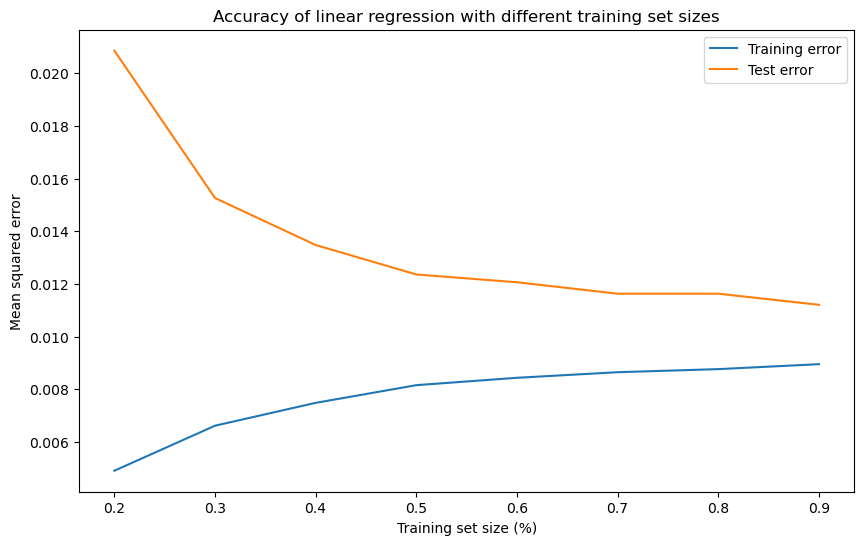

In [121]:
for _ in range(iterations):
    X_synthetic, y_synthetic = make_regression(n_samples=1000,noise=0.1)
    train_errors_all_sizes = []
    test_errors_all_sizes = []
    
    for training_size in training_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X_synthetic, y_synthetic, train_size=training_size)
        model = LinearRegression()
        model.fit(X_train, y_train)
            
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        train_error = mean_squared_error(y_train, train_predictions)
        test_error = mean_squared_error(y_test, test_predictions)

        train_errors_all_sizes.append(train_error)
        test_errors_all_sizes.append(test_error)

    train_errors_all_iterations.append(train_errors_all_sizes)
    test_errors_all_iterations.append(test_errors_all_sizes)    

# Take the average of the errors from each run
avg_train_errors = np.mean(train_errors_all_iterations, axis=0)
avg_test_errors = np.mean(test_errors_all_iterations, axis=0)

#Plot training and test error as a function of the training size
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, avg_train_errors, label='Training error')
plt.plot(training_sizes, avg_test_errors, label='Test error')
plt.xlabel('Training set size (%)')
plt.ylabel('Mean squared error')
plt.title('Accuracy of linear regression with different training set sizes')
plt.legend()
plt.show()

In this graph we can conclude that a training size of under 30% can really harm the error value.
From 50% onward the training size will not influence the test error that much on this dataset. We can also notice that the training error increases while the test error decreases. This could be due to the fact that the training size is bigger and that it is harder for the algorithm to generalize on more data.

# 3.1.2 Random Forest

The second algorithm that will be used is the Random Forest Regressor from sklearn. Random Forest is an algorithm that can be used both for classification and for regression. In this case it is used for regression. This algorithm picks samples from the dataset, and creates a decision for every one of them. What distinguishes this algorithm from other decision tree algorithms is that it chooses a random subset of the available features for every node. To make predictions for new data, the algorithm passes this data point down every decision tree. Every tree outputs an individual prediction. The final prediction is the average of all the individual ones. The randomness in this algorithm and the fact that we're averaging over all trees makes the model more robust against overfitting.

This regression algorithm will be used with 9 different training sizes (10%, 30%, ..., 90%). This is a more complex algorithm so a more complex dataset was created. The rest of the code is the same as in the first function. The model is created, fitted, predictions are made, and finally the error is calculated and put in a graph.

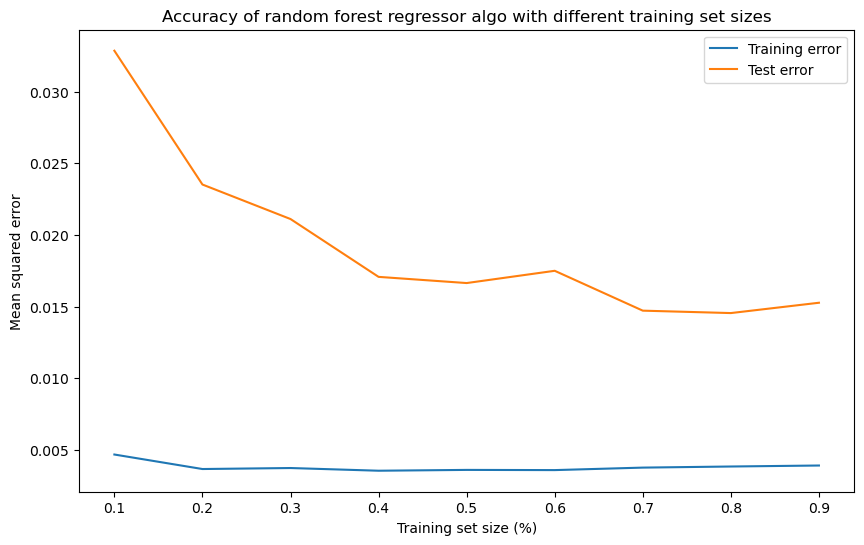

In [122]:
training_sizes = [i / 100 for i in range(10, 100, 10)]  # this creates a list [0.2, 0.3, ..., 0.9]
train_errors_all_iterations = []
test_errors_all_iterations = []
iterations = 10

for _ in range(iterations):
    X_synthetic, y_synthetic = make_friedman3(n_samples=1000,noise=0.1)
    train_errors_all_sizes = []
    test_errors_all_sizes = []

    for training_size in training_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X_synthetic, y_synthetic, train_size=training_size)
        model = RandomForestRegressor(n_estimators=100, max_depth=10)
        model.fit(X_train, y_train)

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        train_error = mean_squared_error(y_train, train_predictions)
        test_error = mean_squared_error(y_test, test_predictions)

        train_errors_all_sizes.append(train_error)
        test_errors_all_sizes.append(test_error)

    
    train_errors_all_iterations.append(train_errors_all_sizes)
    test_errors_all_iterations.append(test_errors_all_sizes)    

# Take the average of the errors from each run
avg_train_errors = np.mean(train_errors_all_iterations, axis=0)
avg_test_errors = np.mean(test_errors_all_iterations, axis=0)

#Plot training and test error as a function of the training size
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, avg_train_errors, label='Training error')
plt.plot(training_sizes, avg_test_errors, label='Test error')
plt.xlabel('Training set size (%)')
plt.ylabel('Mean squared error')
plt.title('Accuracy of random forest regressor algo with different training set sizes')
plt.legend()
plt.show()

This algroithm shows the same trend as with the linear regression. This means we can conclude a very low training set size will definitely impact the performance of the model. The model has a better performance the more training data it uses.

# 3.2 Data augmentation

# 3.2.1 Convolutional Neural Networks

This last experiment will analyse the effect of data augmentation on the accuracy of a model using a Convolutional Neural Network. 

CNN is a type of neural network that is works well with grid-like data like images. This NN is built as follows:
- Convolutional layer: Filters are applied on the input data to create feature maps. These are matrices of weights that help it recognize image features like edges, shapes, etc.
- Following this an activation function is used. In this case 'relu' was chosen. This chooses whether the neuron is activated or not. This is computionally very helpful because not all the neurons will be activated at the same time. 
- Pooling layer: This layer reduces the amount of parameters and will avoid too much overfitting by limiting the size of the network. 
These three steps can be repeated a number of times to increase the complexity of the model..

- Fully-connected layer: This is used near the end of the network and uses all the activated neurons from the previous layers. This layer will apply weights to predict the correct label that will be outputted. The last fully-connected layer will output the probabilities for every possible label that could be predicted.
- After the last fully-connected layer, a last activation function is applied to the layer.

The experiment will be conducted with a dataset that consists of flower images that can be grouped in 10 different categories. This will be a classification problem. This dataset consists of only 210 samples.

First of all, the dataset is loaded and the images and their labels are divided in a train and test set. These images (who have the dimensions 128x128) are normalized to facilitate the work of the CNN.

In [123]:
# Define constants
IMG_SIZE = 128
BATCH_SIZE = 16
EPOCHS = 20
tf.random.set_seed(42)
random_state = 42
labels_df = pd.read_csv('flower_images/flower_labels.csv')
image_path = 'flower_images'

# Load the dataset
def load_images_labels(path, labels_df):
    images, labels = [], []
    for file in os.listdir(path):
        if file.endswith('.png'):
            img_path = os.path.join(path, file)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            label = labels_df[labels_df['file'] == file]['label'].values[0]

            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load dataset
images, labels = load_images_labels(image_path, labels_df)

# Normalize pixel values
images = images / 255.0

# Train-test split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=random_state)

Two different models are created. One is a simple CNN model where no data augmentation is applied, and the second one is a model that applies 3 different types of data augmentation.

I was heavily inspired by this code: https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/17_data_augmentation/cnn_flower_image_classification_data_augmentations.ipynb
For the fine-tuning of my model and my data_augmentation values, since the purpose of this experiment is solely to show the effects of data_augmentation.  

In [124]:
def CNN_data_augmentation():
    data_augmentation = keras.Sequential([
        layers.RandomFlip("horizontal", input_shape=(IMG_SIZE, IMG_SIZE, 3)), # Flip the image horizontally
        layers.RandomRotation(0.1), # Rotate the image with a randomly chosen angle
        layers.RandomZoom(0.1), # Zoom slightly in on an image
    ])

    # Create a simple CNN model
    def create_model(data_aug):
        model = Sequential()
        if data_aug:     #If this model uses data_augmentation, add the data_augmentation as the first layer of the model
            model.add(data_augmentation)
        model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())
        model.add(Dense(64, activation='relu'))
        model.add(Dense(10))  # 10 different types of flowers
        model.add(Activation('softmax'))

        model.compile(optimizer='adam', # or adam
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model


    # Create and train model without data augmentation
    model_no_aug = create_model(False) # False --> No data augmentation
    
    history_no_aug = model_no_aug.fit(train_images, train_labels, 
                                     batch_size=BATCH_SIZE, 
                                     steps_per_epoch=len(train_images) // BATCH_SIZE,
                                     epochs=EPOCHS, validation_data=(test_images, test_labels))


    model_with_aug = create_model(True) # True --> Uses data augmentation

    history_with_aug = model_with_aug.fit(train_images, train_labels, 
                                         batch_size=BATCH_SIZE,
                                         steps_per_epoch=len(train_images) // BATCH_SIZE,
                                         epochs=EPOCHS, validation_data=(test_images, test_labels))


    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history_no_aug.history['accuracy'])
    plt.plot(history_no_aug.history['val_accuracy'])
    plt.title('Accuracy without data augmentation')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.ylim(0,1.1)
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.subplot(1, 2, 2)
    plt.plot(history_with_aug.history['accuracy'])
    plt.plot(history_with_aug.history['val_accuracy'])
    plt.title('Accuracy with data augmentation')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.ylim(0,1.1)
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()
    
    # Evaluate both models and print the accuracies
    loss_no_aug, acc_no_aug = model_no_aug.evaluate(test_images, test_labels, verbose=0)
    print('Model without data augmentation - Accuracy:', acc_no_aug)

    loss_with_aug, acc_with_aug = model_with_aug.evaluate(test_images, test_labels, verbose=0)
    print('Model with simple data augmentation - Accuracy:', acc_with_aug)

By running the function below the two different models will be built. We can clearly see the difference that data augmentation (DA) creates. The model without DA will overfit the data on the training set, which leads to poor generalisation. By adding DA the model is feeded with more information without adding more data samples. The overfitting is greatly reduced and the test performance is enhanced due to this.

Epoch 1/20
10/10 [==============================] - 4s 229ms/step - loss: 2.3514 - accuracy: 0.1125 - val_loss: 2.2662 - val_accuracy: 0.0952
Epoch 2/20
10/10 [==============================] - 2s 166ms/step - loss: 2.1471 - accuracy: 0.2434 - val_loss: 2.1549 - val_accuracy: 0.0952
Epoch 3/20
10/10 [==============================] - 2s 187ms/step - loss: 1.7503 - accuracy: 0.3947 - val_loss: 1.8407 - val_accuracy: 0.2619
Epoch 4/20
10/10 [==============================] - 2s 179ms/step - loss: 1.3466 - accuracy: 0.5526 - val_loss: 1.7267 - val_accuracy: 0.3095
Epoch 5/20
10/10 [==============================] - 2s 181ms/step - loss: 1.1338 - accuracy: 0.5921 - val_loss: 1.4533 - val_accuracy: 0.4524
Epoch 6/20
10/10 [==============================] - 2s 171ms/step - loss: 0.7024 - accuracy: 0.8158 - val_loss: 1.6581 - val_accuracy: 0.5000
Epoch 7/20
10/10 [==============================] - 2s 173ms/step - loss: 0.6506 - accuracy: 0.7632 - val_loss: 1.2628 - val_accuracy: 0.5238
Epoch 

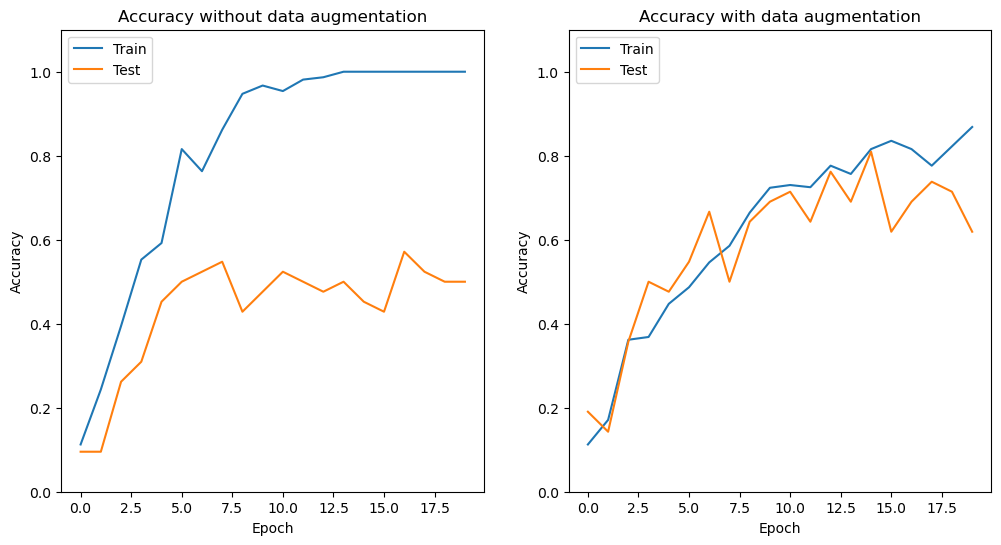

Model without data augmentation - Accuracy: 0.5
Model with simple data augmentation - Accuracy: 0.6190476417541504


In [125]:
CNN_data_augmentation()

# 3.3 Conclusion
We can conclude that the training size has a mild effect on the error value of the test set as long as it is not too low. If this value is too low the data could be overfitted which will harm the results of the test set. A very high training size (90%) will also lead to very good results.

Data augmentation has a much clearer impact. It can reduce overfitting in the case where there aren't many data samples by giving more information to the model. This experiment used a very small dataset of only 210 images, which is why data augmentation was so usefull in this case. It gives us the possibility to retrieve much more information out of the images without needing extra data samples, either by rotating, zooming, changing the brightness, etc. This is a very useful feature in the fine-tuning of a classification model.